In [1]:
import cobra
import pandas as pd
import modelseedpy

modelseedpy 0.4.0


# Load Base Models

In [2]:
model_rhoda = cobra.io.load_json_model('./data/model_rhoda_gf2.json')
model_acido = cobra.io.load_json_model('./data/model_acido_gf2.json')

Set parameter TSPort to value 27070
Set parameter TokenServer to value "lic-vmw-01.cels.anl.gov"


In [3]:
MEDIA_ACETATE_NITRATE = {
    'EX_cpd00067_e0': 100.0,
    'EX_cpd00058_e0': 100.0,
    'EX_cpd00971_e0': 34.9324073,
    'EX_cpd00013_e0': 100.0,
    'EX_cpd00205_e0': 1.3415688,
    'EX_cpd00009_e0': 100.0,
    'EX_cpd11574_e0': 100.0,
    'EX_cpd00048_e0': 100.0,
    'EX_cpd00030_e0': 100.0,
    'EX_cpd00209_e0': 10.0,
    'EX_cpd00254_e0': 100.0,
    'EX_cpd10515_e0': 100.0,
    'EX_cpd00149_e0': 100.0,
    'EX_cpd00099_e0': 100.0,
    'EX_cpd00001_e0': 100.0,
    'EX_cpd00029_e0': 20.0,
    'EX_cpd00063_e0': 100.0,
    'EX_cpd00034_e0': 100.0,
    'EX_cpd00305_e0': 100.0
}

# SynCom Default

In [4]:
%run ms_ext_symcom.py
cf = CommFactory().with_model(model_acido, 0.7, 'A').with_model(model_rhoda, 0.3, 'R')
model_comm = _build(cf)
if 'bio1' not in model_comm.reactions:
    r_bio_sum = Reaction("bio1", "bio_com", "", 0, 1000)
    r_bio_sum.add_metabolites(
        {
            model_comm.metabolites.cpd11416_cA: -0.4,
            model_comm.metabolites.cpd11416_cR: -0.6,
        }
    )
    model_comm.add_reactions([r_bio_sum])
model_comm.objective = 'bio1'
model_comm

Name,model
Memory address,7f92b8ce7a60
Number of metabolites,2401
Number of reactions,2592
Number of genes,0
Number of groups,0
Objective expression,1.0*bio1 - 1.0*bio1_reverse_b18f7
Compartments,"cA, e0, cR"


In [5]:
GSP_MEDIUM = {
    'EX_cpd00001_e0': 1000.0,
    'EX_cpd00013_e0': 1000.0,

    'EX_cpd00209_e0': 12.0,
    'EX_cpd00029_e0': 20.0, # acetate
 
    'EX_cpd00218_e0': 100.0,
    'EX_cpd00220_e0': 100.0,
    'EX_cpd00644_e0': 0.0002281,
    'EX_cpd00305_e0': 100.0,
    'EX_cpd00393_e0': 100.0,
    'EX_cpd03424_e0': 100.0,
    'EX_cpd00443_e0': 100.0,
    'EX_cpd00263_e0': 100.0,
    'EX_cpd00048_e0': 100.0,
    'EX_cpd00009_e0': 100.0,
    'EX_cpd00242_e0': 29.759425,
    'EX_cpd00205_e0': 1.3415688,
    'EX_cpd00063_e0': 100.0,
    'EX_cpd00971_e0': 34.9324073,
    'EX_cpd00099_e0': 100.0,
    'EX_cpd00254_e0': 100.0,
    'EX_cpd00030_e0': 100.0,
    'EX_cpd00058_e0': 100.0,
    'EX_cpd00034_e0': 100.0,
    'EX_cpd10515_e0': 100.0,
    'EX_cpd00149_e0': 100.0,
    'EX_cpd00244_e0': 100.0,
    'EX_cpd11574_e0': 100.0,
    'EX_cpd15574_e0': 100.0,
    'EX_cpd00067_e0': 100.0,
 }
model_comm.medium = {rxn_id: v for rxn_id, v in GSP_MEDIUM.items() if rxn_id in model_comm.reactions}

In [6]:
solution_comm_wt = cobra.flux_analysis.pfba(model_comm)
model_comm.summary(solution_comm_wt)

Metabolite,Reaction,Flux,C-Number,C-Flux
cpd00009_e0,EX_cpd00009_e0,0.1741,0,0.00%
cpd00013_e0,EX_cpd00013_e0,2.107,0,0.00%
cpd00029_e0,EX_cpd00029_e0,12.64,2,99.98%
cpd00030_e0,EX_cpd00030_e0,0.0004214,0,0.00%
cpd00034_e0,EX_cpd00034_e0,0.0004214,0,0.00%
cpd00048_e0,EX_cpd00048_e0,0.05411,0,0.00%
cpd00058_e0,EX_cpd00058_e0,0.0004214,0,0.00%
cpd00063_e0,EX_cpd00063_e0,0.0004214,0,0.00%
cpd00067_e0,EX_cpd00067_e0,22.9,0,0.00%
cpd00099_e0,EX_cpd00099_e0,0.0004214,0,0.00%


In [7]:
%run ./plots.py

In [8]:
comm_plots = CommPlots(model_comm)

In [9]:
atpm_max_cA_isolate, atpm_max_cR_isolate, time_steps, expected_growth_60R_40A, rates = comm_plots.constants()

In [10]:
model_comm.reactions.ATPM_cA.lower_bound = 0
model_comm.reactions.ATPM_cR.lower_bound = 0
solution_array = comm_plots.generate_solutions(cobra, rates, expected_growth_60R_40A)
solution_exp = comm_plots.generate_growth_gap_solutions(cobra, expected_growth_60R_40A, rates, solution_array)

0 GROWTH 0 ATPM, exceess 0.00019351260705472673 0.00018952756705472673
0 MAX isolate ATPM 0.028229963564014558 0.02825951755386416
1 GROWTH 0 ATPM, exceess 0.001900382979840838 0.001856372079840838
1 MAX isolate ATPM 0.3263506936896119 0.32636421652900127
2 GROWTH 0 ATPM, exceess 0.0031083958929655174 0.0030704125929655176
2 MAX isolate ATPM 0.49370309528744694 0.49369846547728563
3 GROWTH 0 ATPM, exceess 0.0008420868425733763 0.0008246068425733764
3 MAX isolate ATPM 0.10949222612221757 0.10949395950670424
4 GROWTH 0 ATPM, exceess 0.0007943173851817941 0.0007855273851817942
4 MAX isolate ATPM 0.09911204826106375 0.09911207510054518
5 GROWTH 0 ATPM, exceess 0.0002891237871341849 0.0002806127871341849
5 MAX isolate ATPM 0.04176959305511194 0.041769453497578185
6 GROWTH 0 ATPM, exceess 7.590085275980524e-06 9.051995275980524e-06
6 MAX isolate ATPM 0.0007191215625 0.0007191215625
Acetate: -0.00796337 NO3 -0.015765185 NO2 -0.000300664 min community biomass 3.98504e-06 mATP 3H11 0.0112919854

In [11]:
exp_syncom = comm_plots.get_exp_syncom()
pred_syncom = comm_plots.generate_total_acc_data(time_steps, solution_exp)

Biomass 3H11 0.0008575773279999989 Biomass R12 0.0013000459919999979 Biomass Total 0.002157623319999997 Time 141 Acetate 12.912023928225292 NO3 0.11462903200001467 NO2 0.7133230734590983 N2O 1.3361934778682103 N2 2.8719723544022444


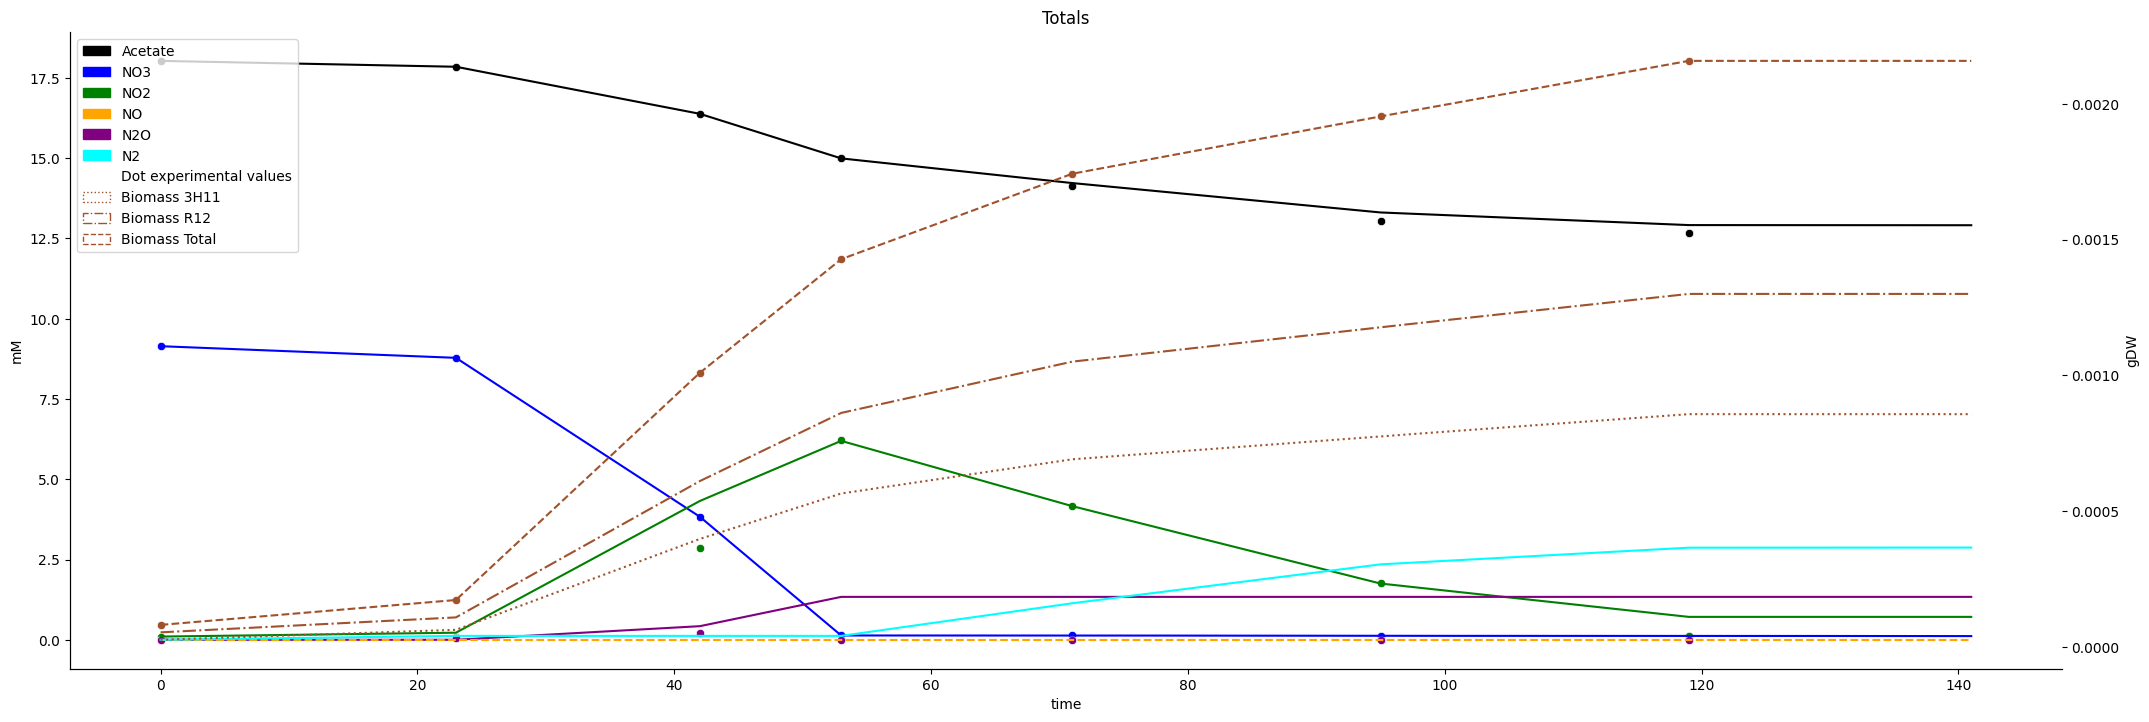

In [12]:
comm_plots.plot_total_acc(pred_syncom, exp_syncom)

0.011291985425605824 0.016926326262637244
0.13054027747584476 0.19579695499120572
0.19748123811497878 0.2962075958817018
0.04379689044888703 0.06569753756557103
0.0396448193044255 0.059470450004161464
0.016707837222044775 0.02506022821087405
0.000287648625 0.0004314729375


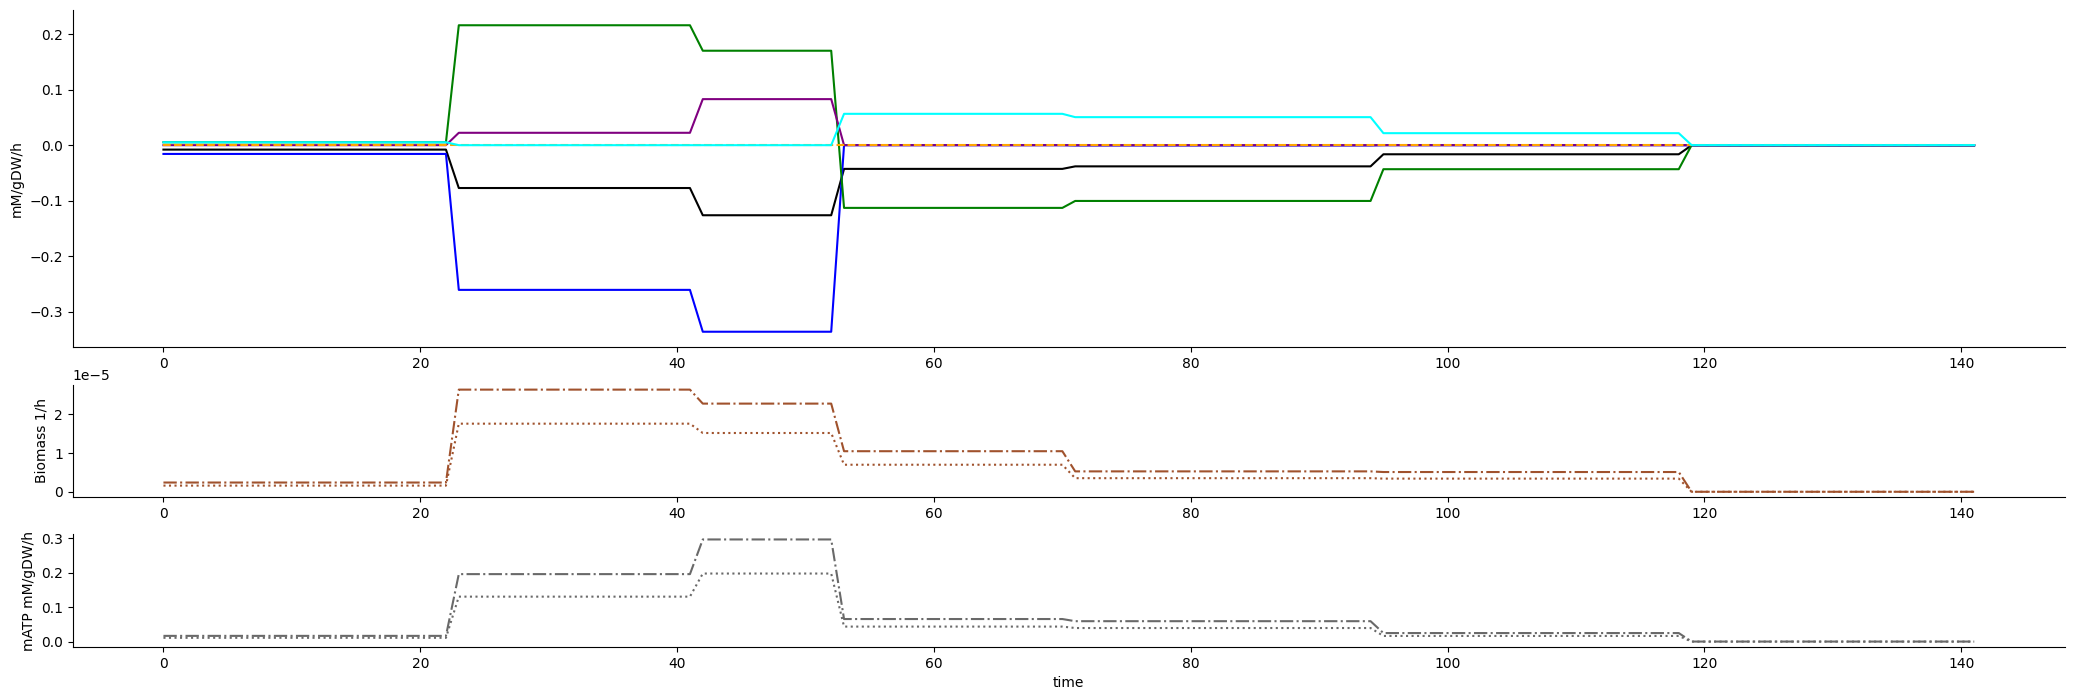

In [13]:
total_uptake_data = comm_plots.generate_total_uptake_data(time_steps, solution_exp)
comm_plots.plot_total_uptake(total_uptake_data)

In [14]:
model_comm.reactions.rxn05161_cA.upper_bound = 0
solution_leucine_50 = comm_plots.generate_leucine_efflux_data(cobra, solution_exp, expected_growth_60R_40A, rates, 0.5)
model_comm.reactions.rxn05161_cA.upper_bound = 0
solution_leucine_10 = comm_plots.generate_leucine_efflux_data(cobra, solution_exp, expected_growth_60R_40A, rates, 0.1)

0 -0.003948565375734184
1 -0.038104421424585005
2 -0.0626924797650577
3 -0.016847266107481006
4 -0.01524954128951025
5 -0.006423216934834526
6 -0.00010822331801470577
0 -0.0008829614527043959
1 -0.010053029202895894
2 -0.015196589605283512
3 -0.0033710676973680905
4 -0.0030502839289330867
5 -0.00128564097815076
6 -2.2126817307692104e-05


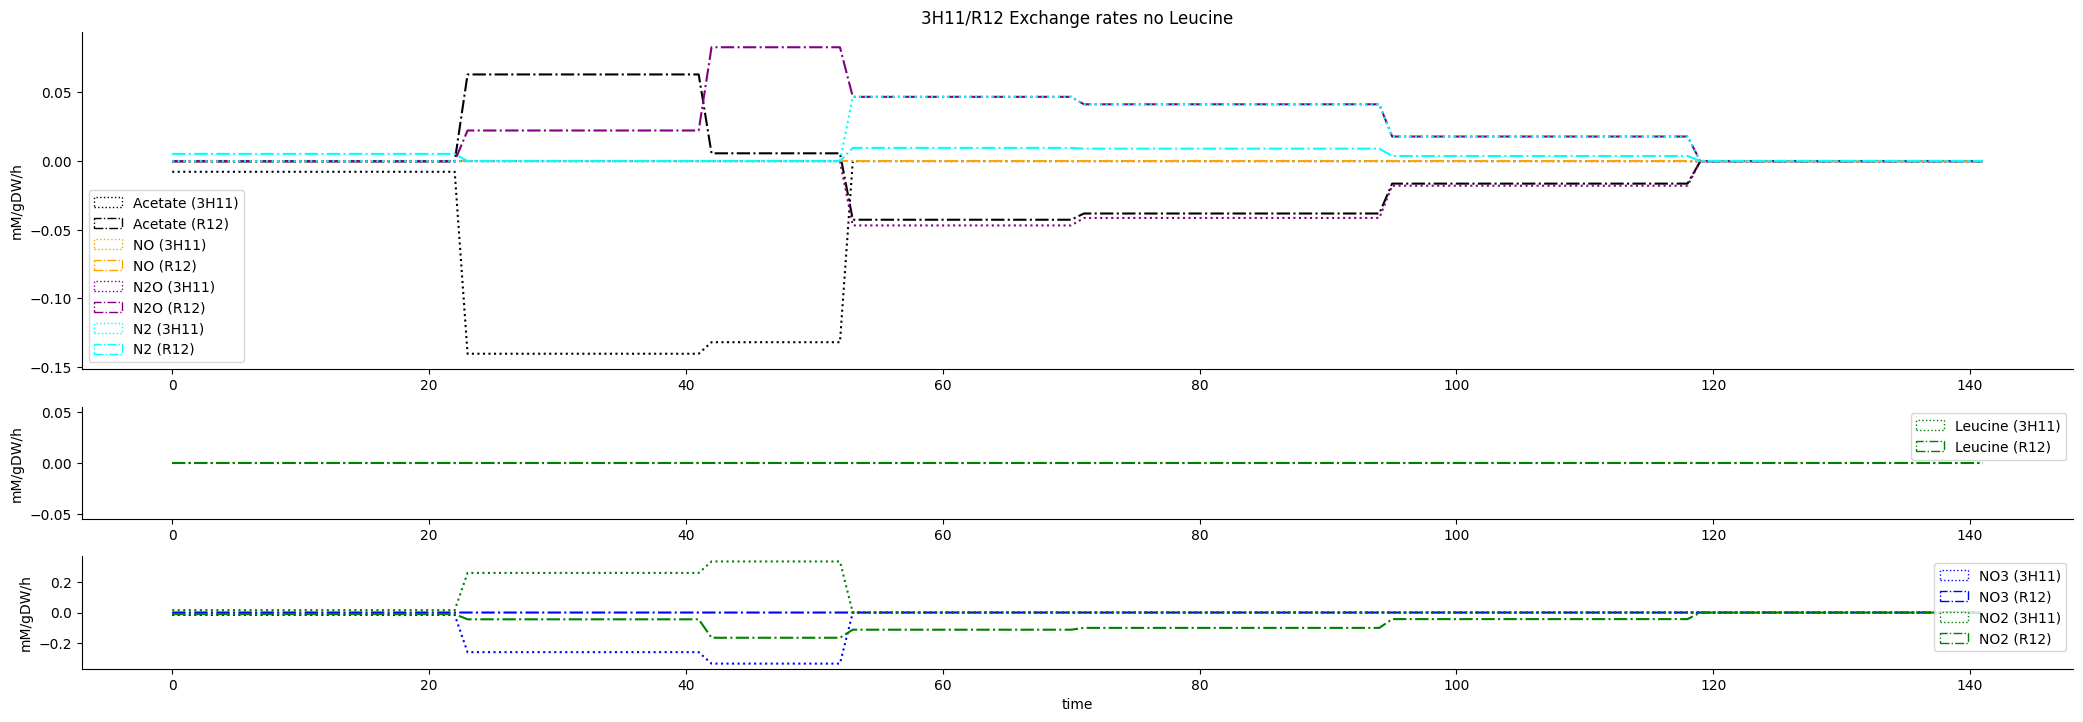

In [15]:
plot_data_zero_leu = comm_plots.generate_organism_uptake_data(time_steps, solution_exp)
plot_data_50_leu = comm_plots.generate_organism_uptake_data(time_steps, solution_leucine_50)
plot_data_10_leu = comm_plots.generate_organism_uptake_data(time_steps, solution_leucine_10)
comm_plots.plot_organism_uptake_data(plot_data_zero_leu, title='3H11/R12 Exchange rates no Leucine')

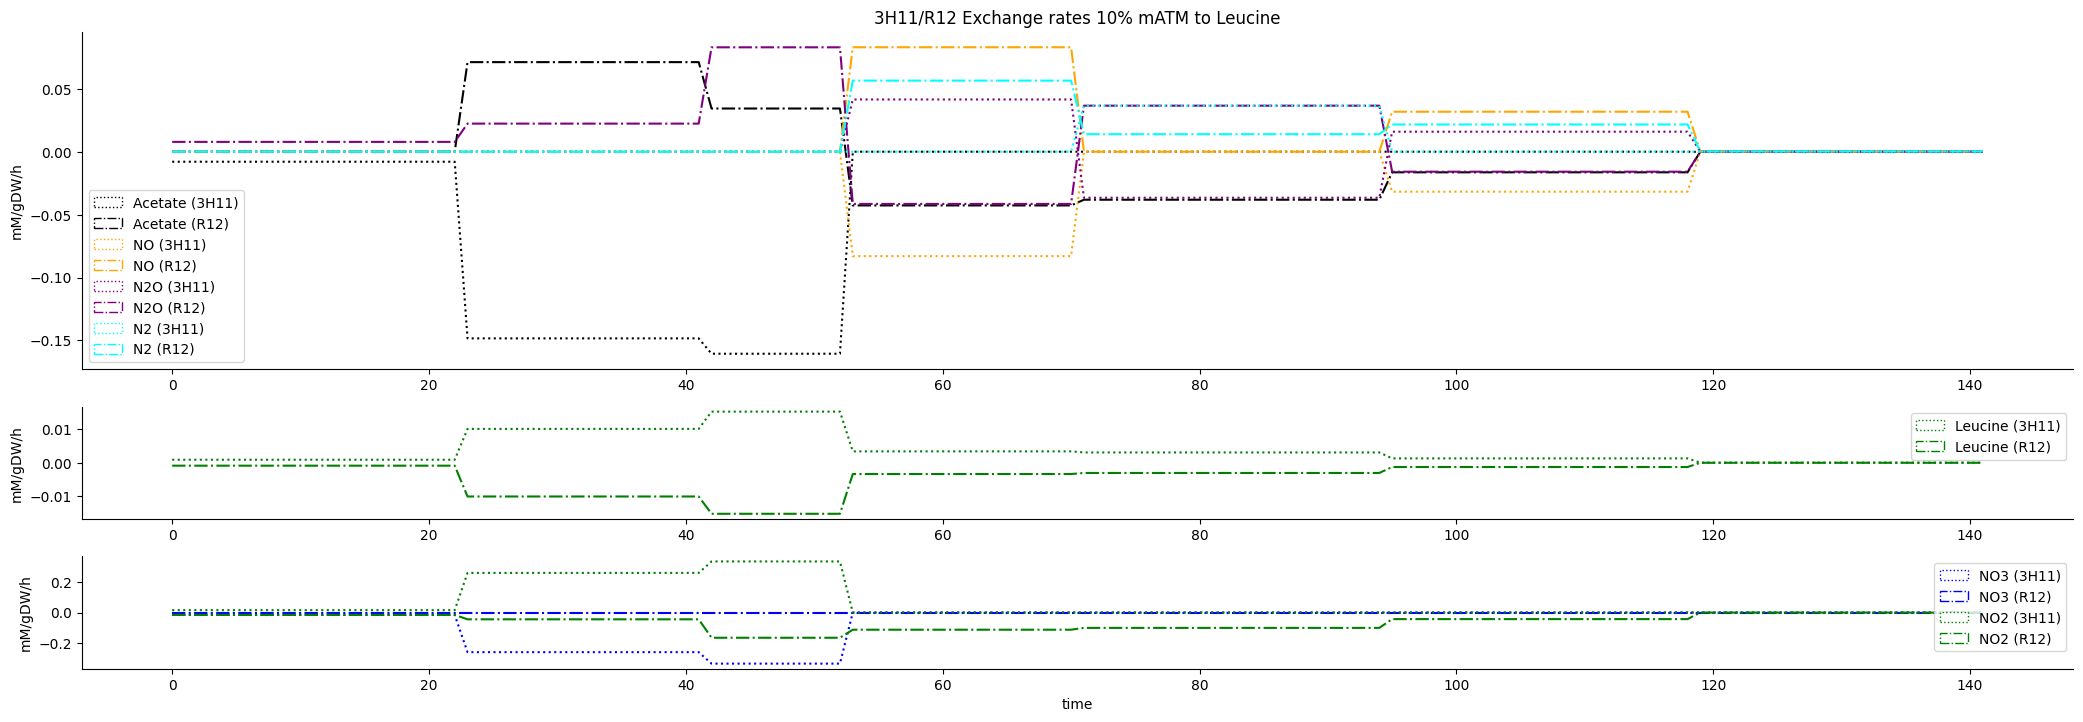

In [16]:
comm_plots.plot_organism_uptake_data(plot_data_10_leu, title='3H11/R12 Exchange rates 10% mATM to Leucine')

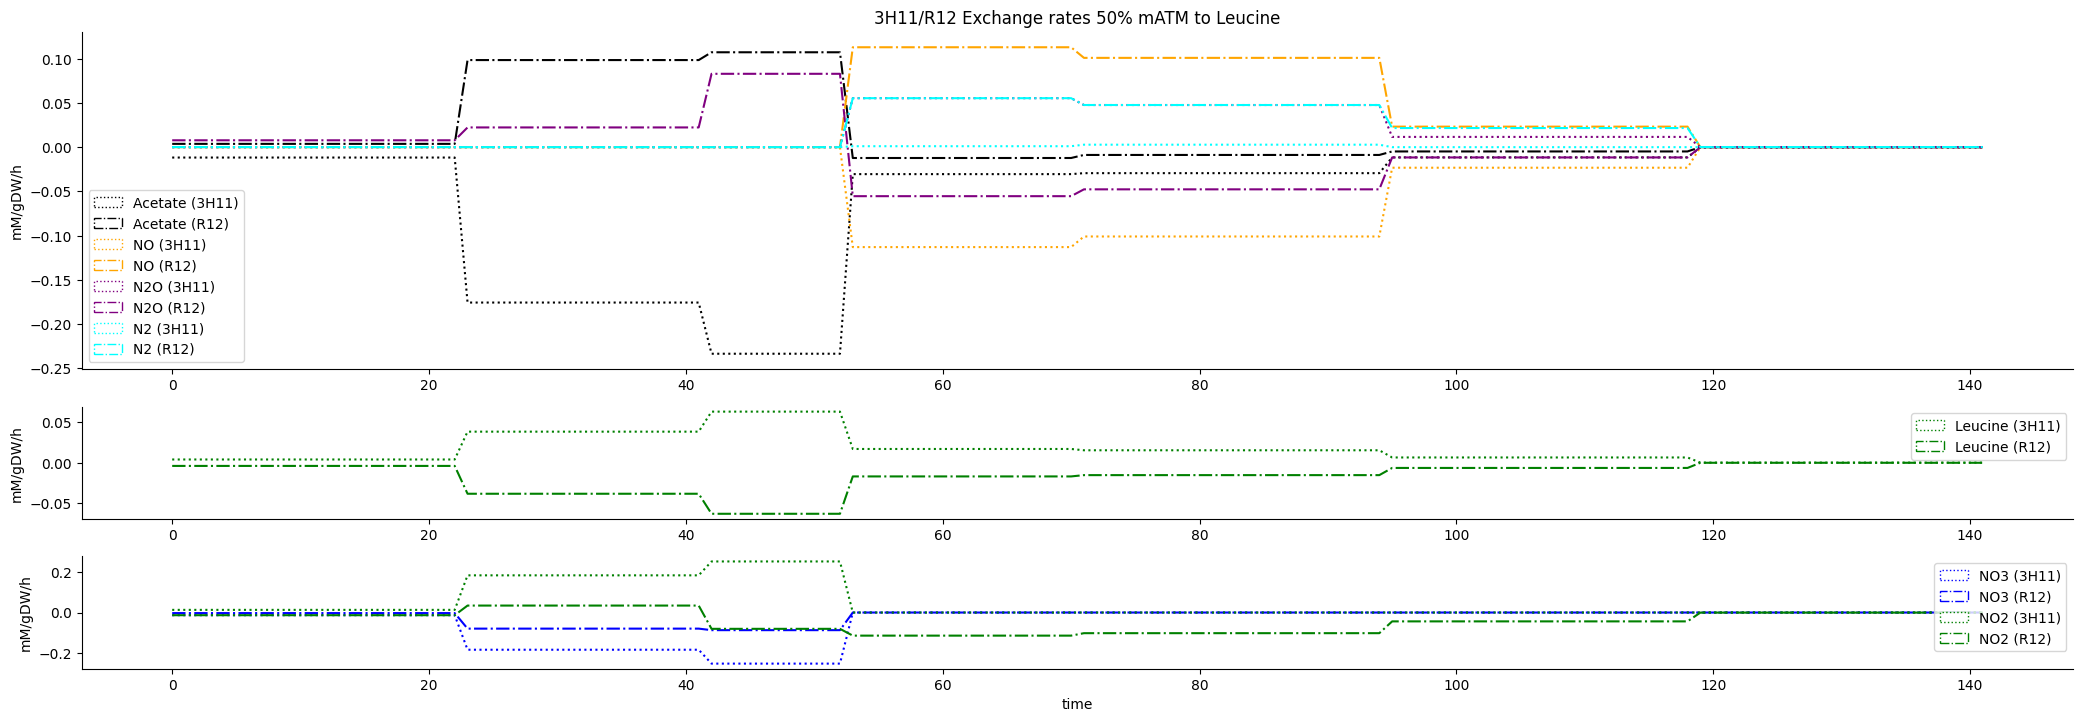

In [17]:
comm_plots.plot_organism_uptake_data(plot_data_50_leu, title='3H11/R12 Exchange rates 50% mATM to Leucine')

# SynCom block N2 on R12

In [18]:
%run ms_ext_symcom.py
cf = CommFactory().with_model(model_acido, 0.7, 'A').with_model(model_rhoda, 0.3, 'R')
model_comm2 = _build(cf, with_gpr=False)
if 'bio1' not in model_comm2.reactions:
    r_bio_sum = Reaction("bio1", "bio_com", "", 0, 1000)
    r_bio_sum.add_metabolites(
        {
            model_comm2.metabolites.cpd11416_cA: -0.4,
            model_comm2.metabolites.cpd11416_cR: -0.6,
        }
    )
    model_comm2.add_reactions([r_bio_sum])
model_comm2.objective = 'bio1'
model_comm2

Name,model
Memory address,7f92b1ad1b10
Number of metabolites,2401
Number of reactions,2592
Number of genes,0
Number of groups,0
Objective expression,1.0*bio1 - 1.0*bio1_reverse_b18f7
Compartments,"cA, e0, cR"


In [19]:
# Block R12 NosZ
model_comm2.reactions.dnr00004_cR.upper_bound = 0

In [20]:
%run ./plots.py
comm_plots = CommPlots(model_comm2)
atpm_max_cA_isolate, atpm_max_cR_isolate, time_steps, expected_growth_60R_40A, rates = comm_plots.constants()
model_comm2.reactions.ATPM_cA.lower_bound = 0
model_comm2.reactions.ATPM_cR.lower_bound = 0
solution_array = comm_plots.generate_solutions(cobra, rates, expected_growth_60R_40A)
solution_exp = comm_plots.generate_growth_gap_solutions(cobra, expected_growth_60R_40A, rates, solution_array)

0 GROWTH 0 ATPM, exceess 0.00019351260705472519 0.0001895275670547252
0 MAX isolate ATPM 0.028249884115387747 0.028264648267734192
1 GROWTH 0 ATPM, exceess 0.0019003829798408295 0.0018563720798408295
1 MAX isolate ATPM 0.32633213822261253 0.32634508831893655
2 GROWTH 0 ATPM, exceess 0.003108395892965525 0.0030704125929655254
2 MAX isolate ATPM 0.49369636823938445 0.49368846700574415
3 GROWTH 0 ATPM, exceess 0.0008420868425733737 0.0008246068425733738
3 MAX isolate ATPM 0.10949344794941614 0.10948997416929018
4 GROWTH 0 ATPM, exceess 0.0007943173851817968 0.0007855273851817969
4 MAX isolate ATPM 0.09911328068807167 0.09911052438300423
5 GROWTH 0 ATPM, exceess 0.0002891237871341897 0.0002806127871341897
5 MAX isolate ATPM 0.041755701139667555 0.041754554395124675
6 GROWTH 0 ATPM, exceess 7.63222266992708e-06 9.09413266992708e-06
6 MAX isolate ATPM 0.0007191215624999991 0.0007191215625000002
Acetate: -0.00796337 NO3 -0.015765185 NO2 -0.000300664 min community biomass 3.98504e-06 mATP 3H11

In [21]:
exp_syncom = comm_plots.get_exp_syncom()
pred_syncom = comm_plots.generate_total_acc_data(time_steps, solution_exp)

Biomass 3H11 0.0008575773279999989 Biomass R12 0.0013000459919999979 Biomass Total 0.002157623319999997 Time 141 Acetate 12.911947796203037 NO3 0.11462903200001467 NO2 0.593032998744925 N2O 1.516657258950835 N2 2.751653610676727


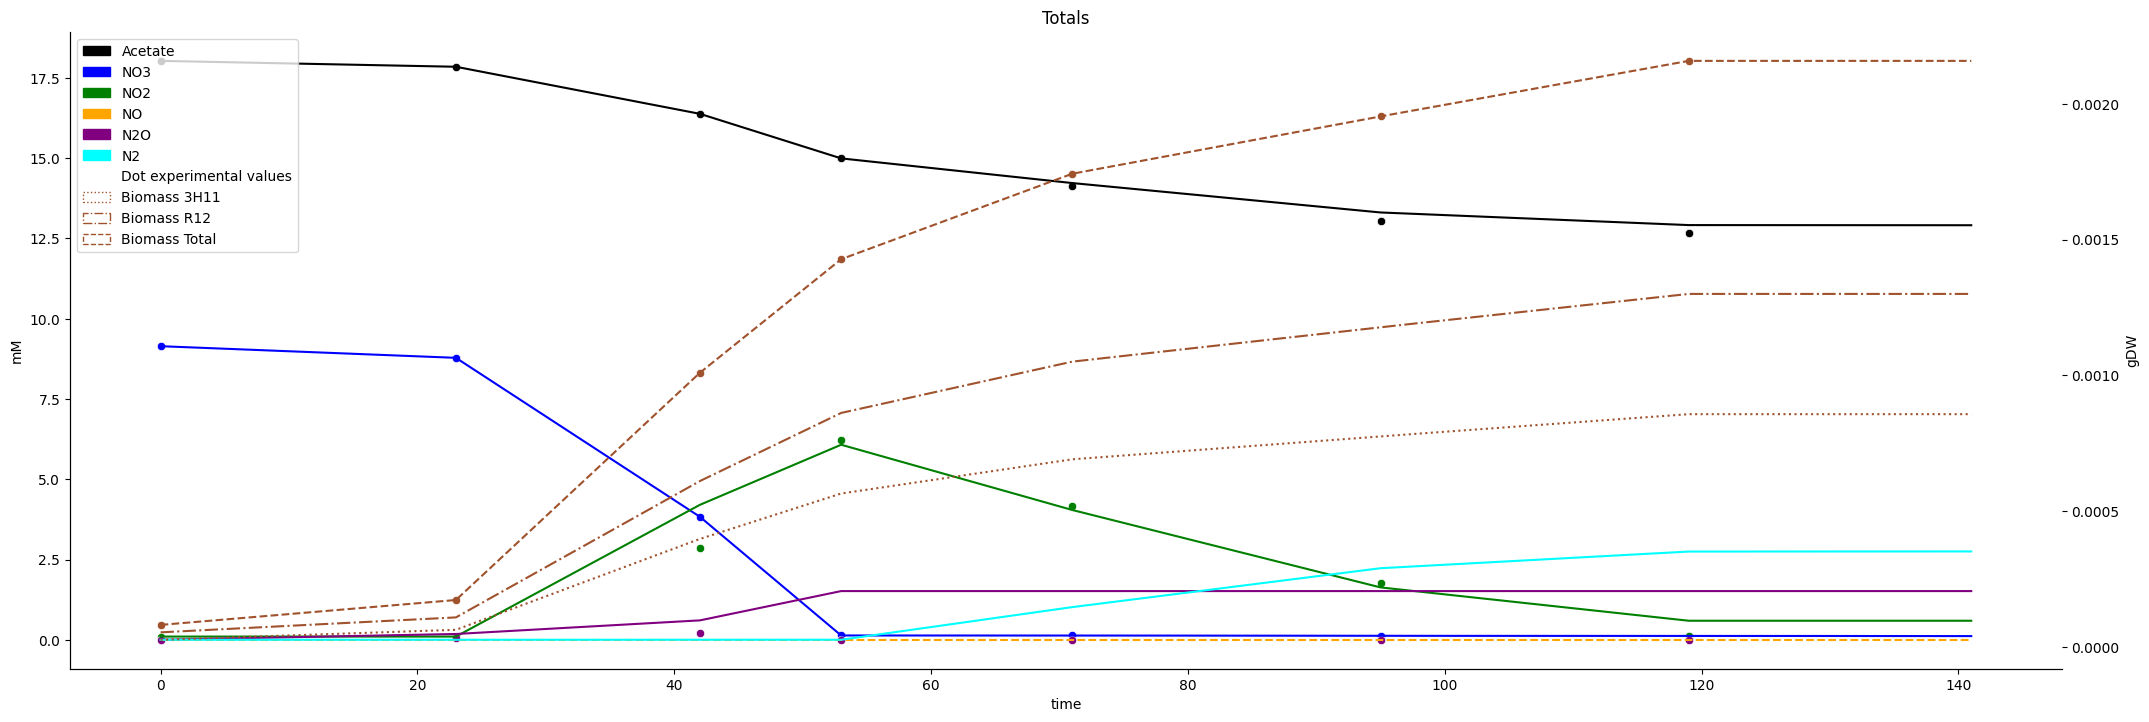

In [22]:
comm_plots.plot_total_acc(pred_syncom, exp_syncom)

0.0112999536461551 0.016924905568715787
0.130532855289045 0.1958190349406435
0.1974785472957538 0.2961979028175249
0.043797379179766456 0.06569270491516527
0.03964531227522867 0.059467747376696654
0.01670228045586702 0.025054157640326202
0.00028764862499999967 0.0004314729375000004


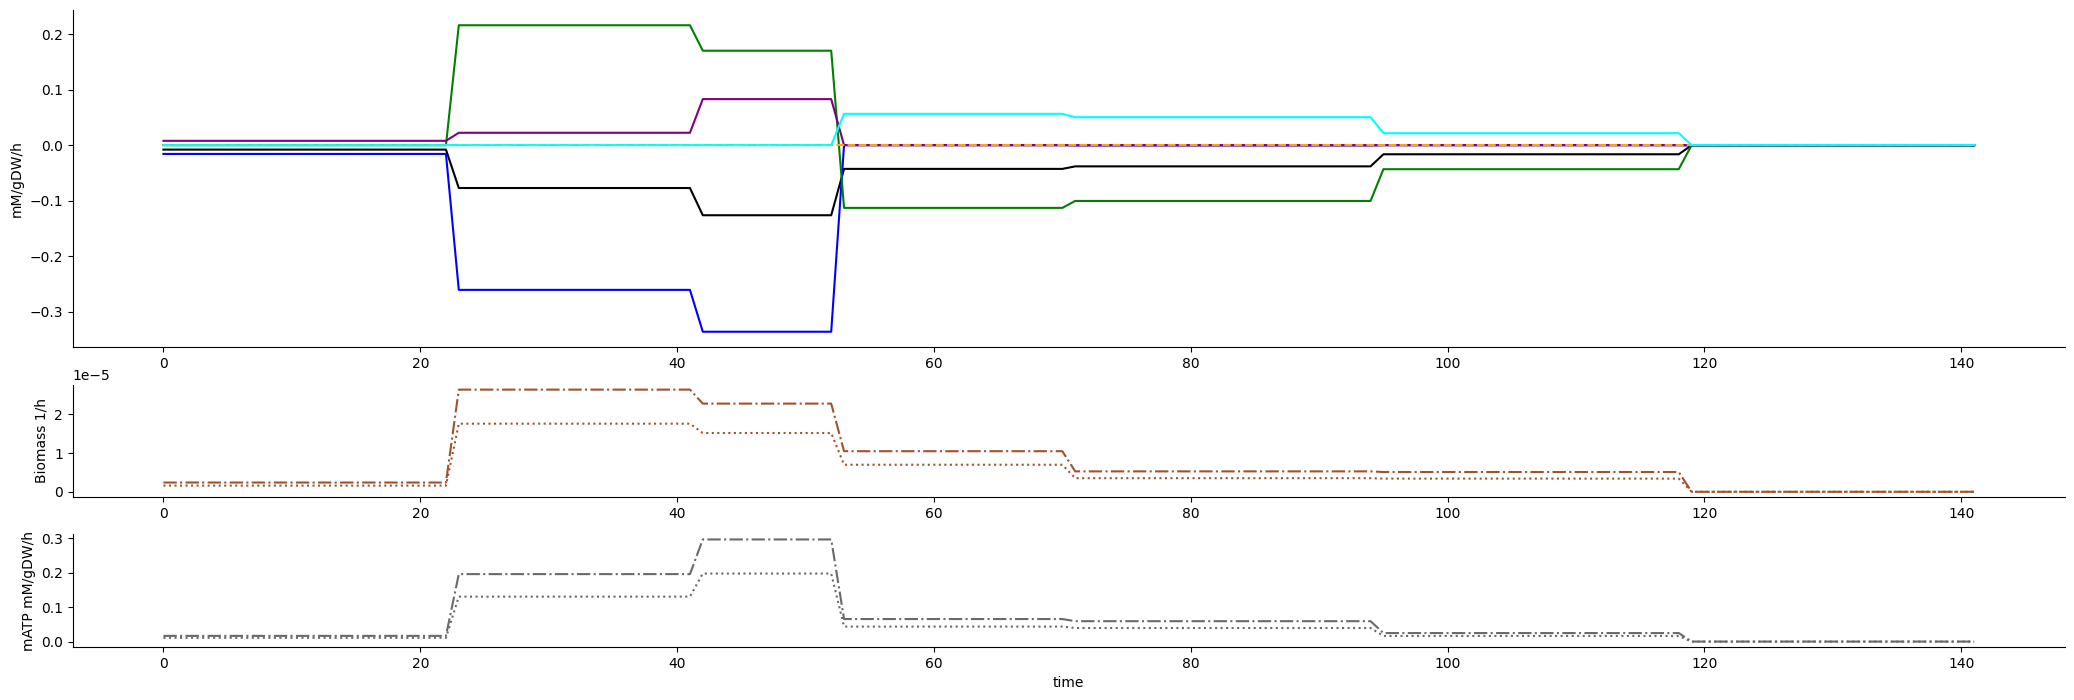

In [23]:
total_uptake_data = comm_plots.generate_total_uptake_data(time_steps, solution_exp)
comm_plots.plot_total_uptake(total_uptake_data)

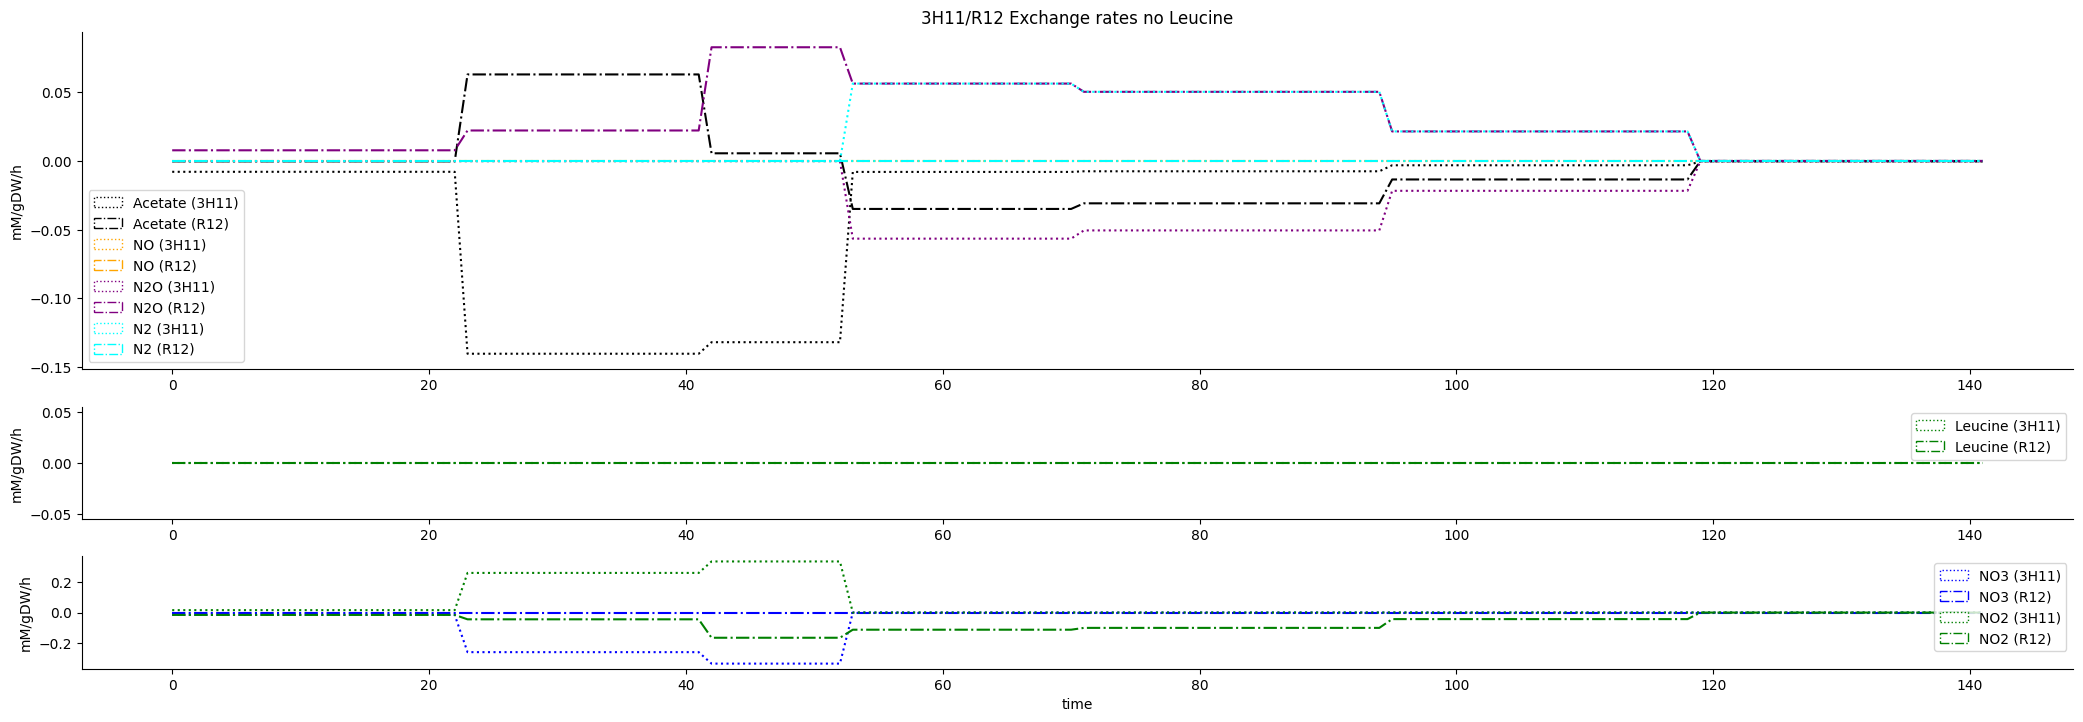

In [24]:
plot_data_zero_leu = comm_plots.generate_organism_uptake_data(time_steps, solution_exp)
comm_plots.plot_organism_uptake_data(plot_data_zero_leu, title='3H11/R12 Exchange rates no Leucine')

In [25]:
model_comm2.reactions.rxn05161_cA.upper_bound = 0
solution_leucine_50 = comm_plots.generate_leucine_efflux_data(cobra, solution_exp, expected_growth_60R_40A, rates, 0.5)
model_comm2.reactions.rxn05161_cA.upper_bound = 0
solution_leucine_10 = comm_plots.generate_leucine_efflux_data(cobra, solution_exp, expected_growth_60R_40A, rates, 0.1)

0 -0.00394595727854661
1 -0.038105240634955725
2 -0.0626925851080865
3 -0.016848404838616233
4 -0.015248910672957444
5 -0.006426176659227157
6 -0.00010822331801470583
0 -0.0008742423854357373
1 -0.010049605528288227
2 -0.015204844130532765
3 -0.003372945493924555
4 -0.003050266963242477
5 -0.0012866159840134999
6 -2.2126817307691433e-05


In [26]:
plot_data_50_leu = comm_plots.generate_organism_uptake_data(time_steps, solution_leucine_50)
plot_data_10_leu = comm_plots.generate_organism_uptake_data(time_steps, solution_leucine_10)

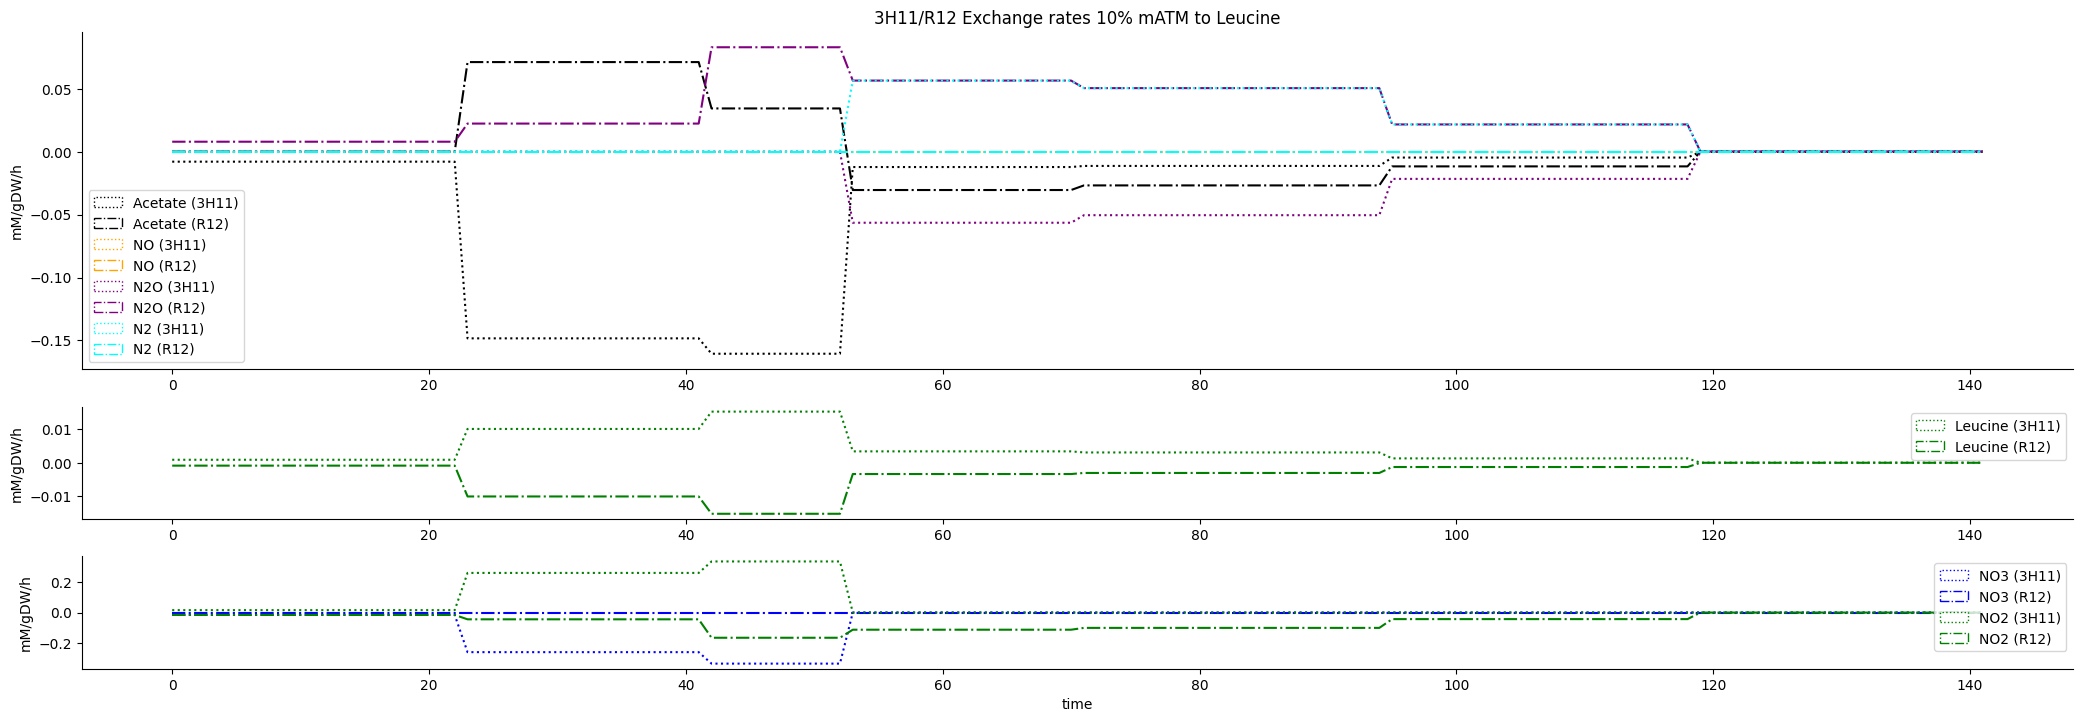

In [27]:
comm_plots.plot_organism_uptake_data(plot_data_10_leu, title='3H11/R12 Exchange rates 10% mATM to Leucine')

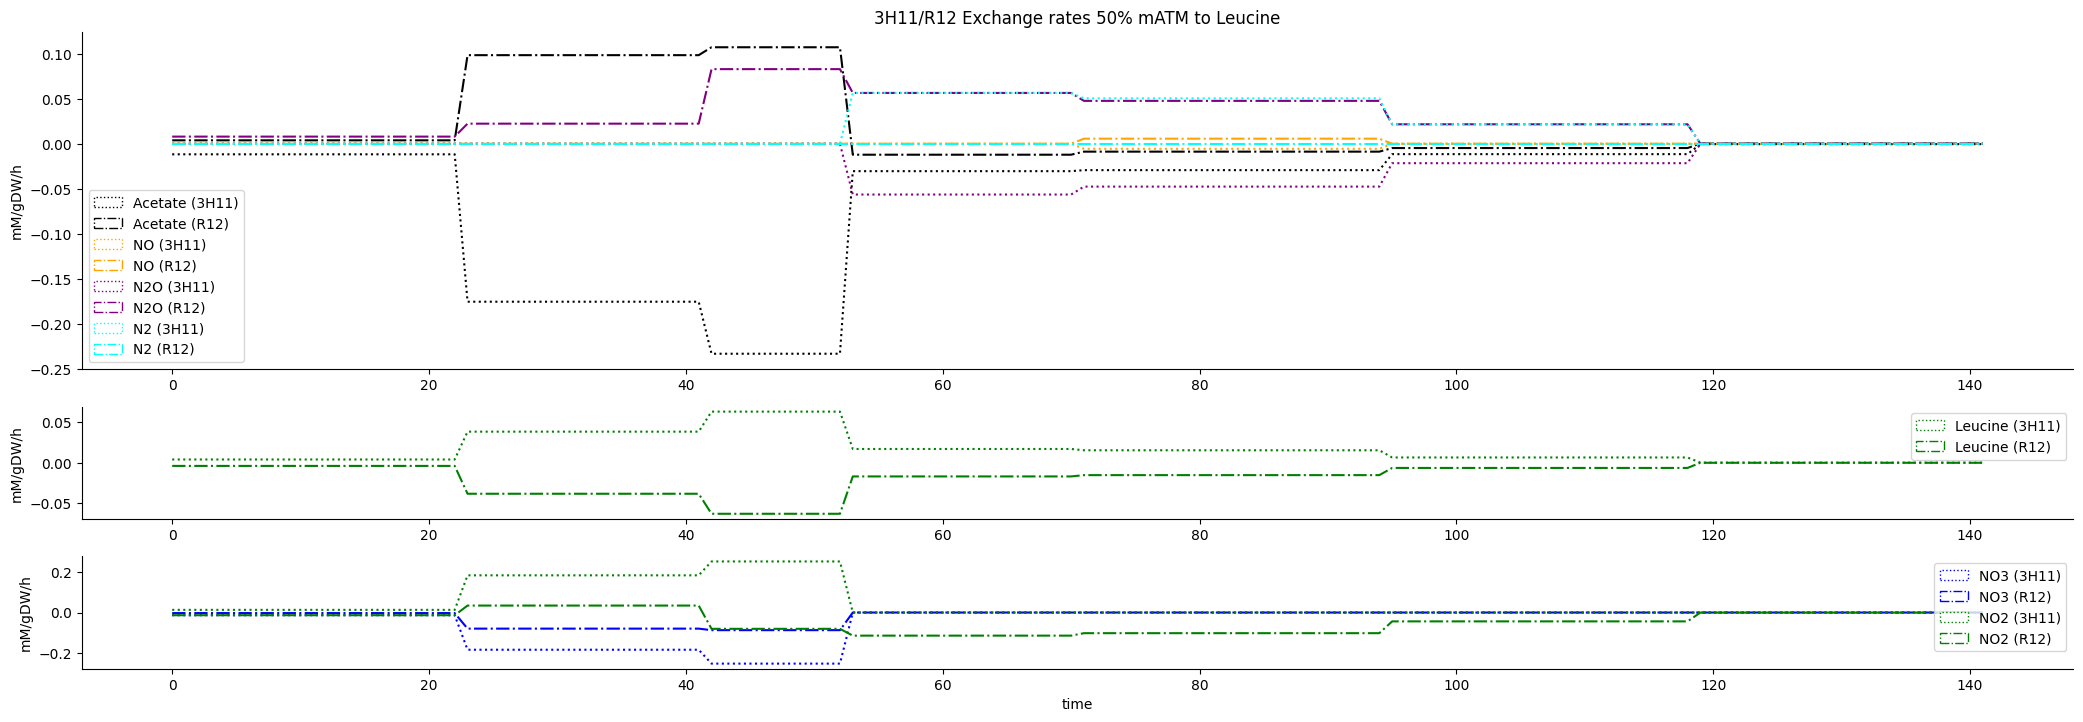

In [28]:
comm_plots.plot_organism_uptake_data(plot_data_50_leu, title='3H11/R12 Exchange rates 50% mATM to Leucine')

In [29]:
%run analysis.py

In [30]:
exclude = {
    'cpd00067_e0', 'cpd00058_e0', 'cpd00239_e0', 'cpd00081_e0',
    'cpd00001_e0', 'cpd00013_e0', 'cpd00205_e0', 'cpd00009_e0',
    'cpd10515_e0', 'cpd00254_e0', 'cpd00034_e0', 'cpd00149_e0',
    'cpd00063_e0', 'cpd00099_e0', 'cpd00030_e0', 'cpd00048_e0',
    'cpd00305_e0', 'cpd00047_e0', 'cpd00011_e0'
}
model_comm_io(model_comm2, solution_array[1]['solution'], exclude)

cpd00106_e0 Fumarate [e0] cA;e0 0.05024813621420463
cpd00106_e0 Fumarate [e0] cR;e0 -0.05024813621420463
	 total Fumarate [e0] 0.0
cpd00075_e0 Nitrite [e0] cR;e0 7.2976561006926985e-06
cpd00075_e0 Nitrite [e0] cA;e0 0.16031105624841363
	 total Nitrite [e0] 0.1603183539
cpd00036_e0 Succinate [e0] cA;e0 -0.0001757917097127821
cpd00036_e0 Succinate [e0] cR;e0 0.0001757917097127821
	 total Succinate [e0] 0.0
cpd00209_e0 Nitrate [e0] cR;e0 -7.2976561006926985e-06
cpd00209_e0 Nitrate [e0] cA;e0 -0.16031105624841363
	 total Nitrate [e0] -0.1603183539
cpd00029_e0 Acetate [e0] cR;e0 0.02601553895952209
cpd00029_e0 Acetate [e0] cA;e0 -0.10317384995952208
	 total Acetate [e0] -0.077158311
cpd00020_e0 Pyruvate [e0] cA;e0 -0.006105946560650522
cpd00020_e0 Pyruvate [e0] cR;e0 0.006105946560650522
	 total Pyruvate [e0] 0.0
cpd00363_e0 Ethanol [e0] cA;e0 -0.06506453496781739
cpd00363_e0 Ethanol [e0] cR;e0 0.06506453496781739
	 total Ethanol [e0] 0.0
cpd00071_e0 Acetaldehyde [e0] cR;e0 -0.0627916574161

We can see Acetaldehyde Ethanol Acetate Fumarate Succinate Pyruvate been exchanged between the models

R12 -->    Acetate   --> 3H11 

R12 -->    Ethanol   --> 3H11

R12 <-- Acetaldehyde <-- 3H11

We will block the ability to excrete Acetate and block uptake for Ethanol and Acetaldehyde

In [31]:
model_comm2.reactions.rxn05488_cR.bounds = (0, 1000)
model_comm2.reactions.rxn05488_cR.bounds = (0, 1000)
model_comm2.reactions.rxn08032_cA.bounds = (0, 1000)
model_comm2.reactions.rxn08032_cR.bounds = (0, 1000)
model_comm2.reactions.rxn08428_cA.bounds = (0, 1000)
model_comm2.reactions.rxn08428_cR.bounds = (0, 1000)

In [32]:
monitor = {
    'acetate': 'cpd00029_e0',
    'no3': 'cpd00209_e0',
    'no2': 'cpd00075_e0',
    'no': 'cpd00418_e0',
    'n2o': 'cpd00659_e0',
    'n2': 'cpd00528_e0',
    'leu': 'cpd00107_e0',
    
    'pyr': 'cpd00020_e0',
    'for': 'cpd00047_e0',
    'succ': 'cpd00036_e0',
    'fum': 'cpd00106_e0',
}

0 GROWTH 0 ATPM, exceess 0.00018710323799890112 0.00018311819799890112
0 MAX isolate ATPM 0.028253554797059186 0.028264750187804423
1 GROWTH 0 ATPM, exceess 0.00181287191561189 0.00176886101561189
1 MAX isolate ATPM 0.326342821406569 0.28193590311789457
2 GROWTH 0 ATPM, exceess 0.00296525683335289 0.00292727353335289
2 MAX isolate ATPM 0.4936864659946487 0.4665252512485685
3 GROWTH 0 ATPM, exceess 0.0008420868425733754 0.0008246068425733754
3 MAX isolate ATPM 0.1094921589521533 0.10949171582289213
4 GROWTH 0 ATPM, exceess 0.000794317385181797 0.0007855273851817971
4 MAX isolate ATPM 0.09911162981557199 0.09911102644661317
5 GROWTH 0 ATPM, exceess 0.00028912378713418754 0.00028061278713418754
5 MAX isolate ATPM 0.04175351298850642 0.041771238782689554
6 GROWTH 0 ATPM, exceess 7.4284531941559484e-06 8.890363194155948e-06
6 MAX isolate ATPM 0.0007191215624999998 0.0007181217410714286
Acetate: -0.00796337 NO3 -0.015765185 NO2 -0.000300664 min community biomass 3.98504e-06 mATP 3H11 0.01130

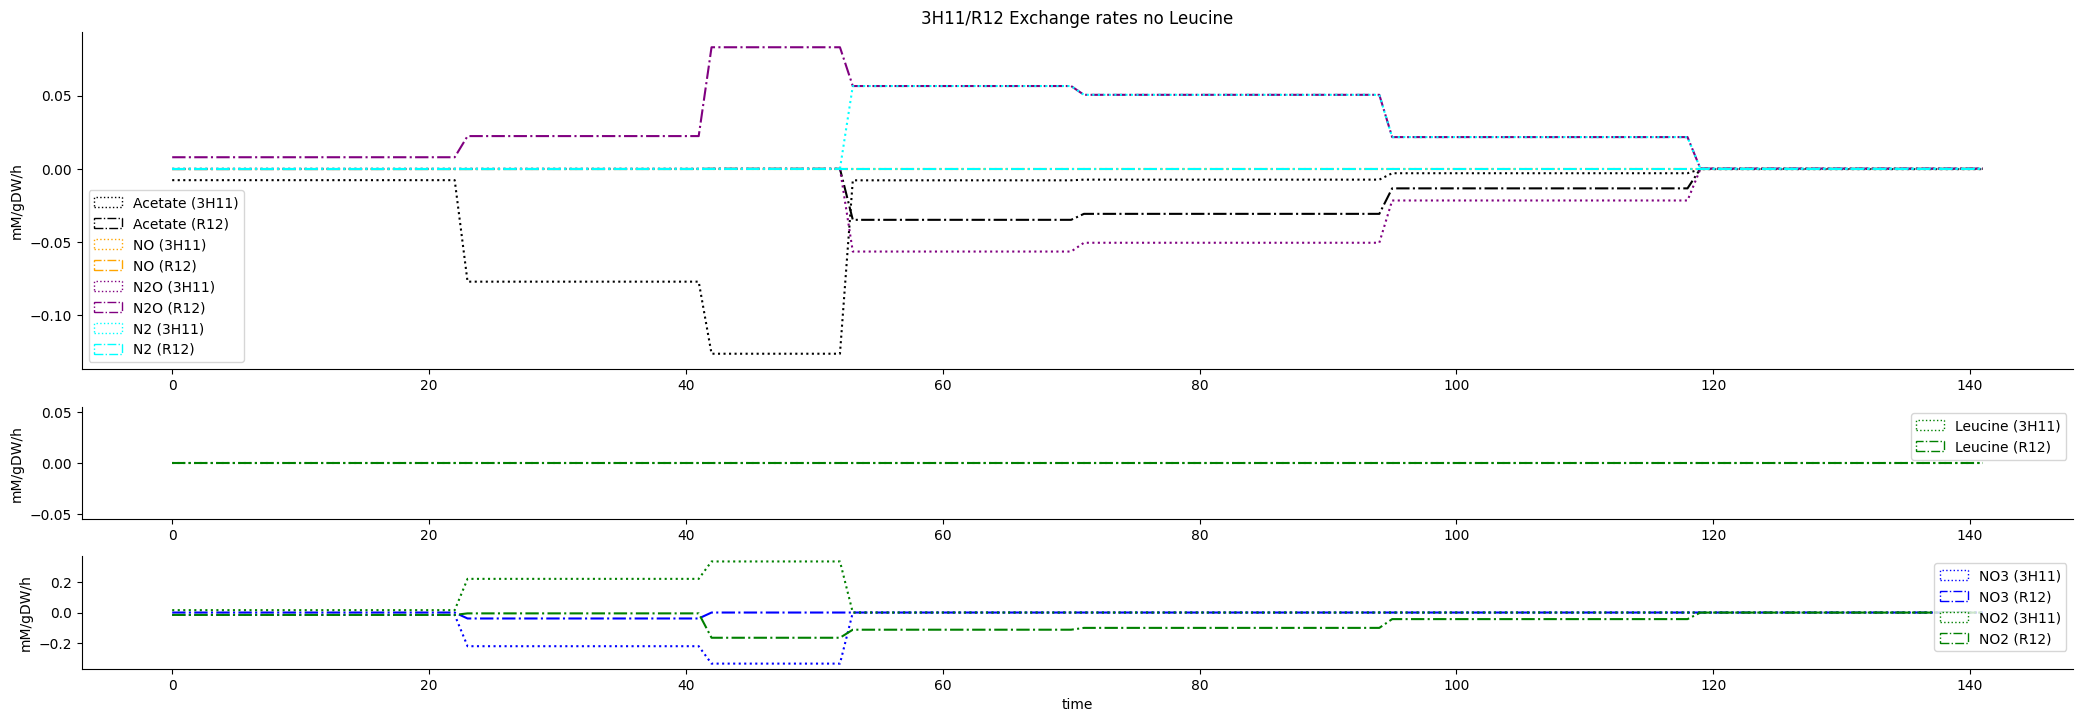

In [33]:
comm_plots = CommPlots(model_comm2)
atpm_max_cA_isolate, atpm_max_cR_isolate, time_steps, expected_growth_60R_40A, rates = comm_plots.constants()
model_comm2.reactions.ATPM_cA.lower_bound = 0
model_comm2.reactions.ATPM_cR.lower_bound = 0
solution_array = comm_plots.generate_solutions(cobra, rates, expected_growth_60R_40A)
solution_exp = comm_plots.generate_growth_gap_solutions(cobra, expected_growth_60R_40A, rates, solution_array)
exp_syncom = comm_plots.get_exp_syncom()
pred_syncom = comm_plots.generate_total_acc_data(time_steps, solution_exp)
plot_data_I = comm_plots.generate_organism_uptake_data(time_steps, solution_exp, monitor)
comm_plots.plot_organism_uptake_data(plot_data_I, title='3H11/R12 Exchange rates no Leucine')

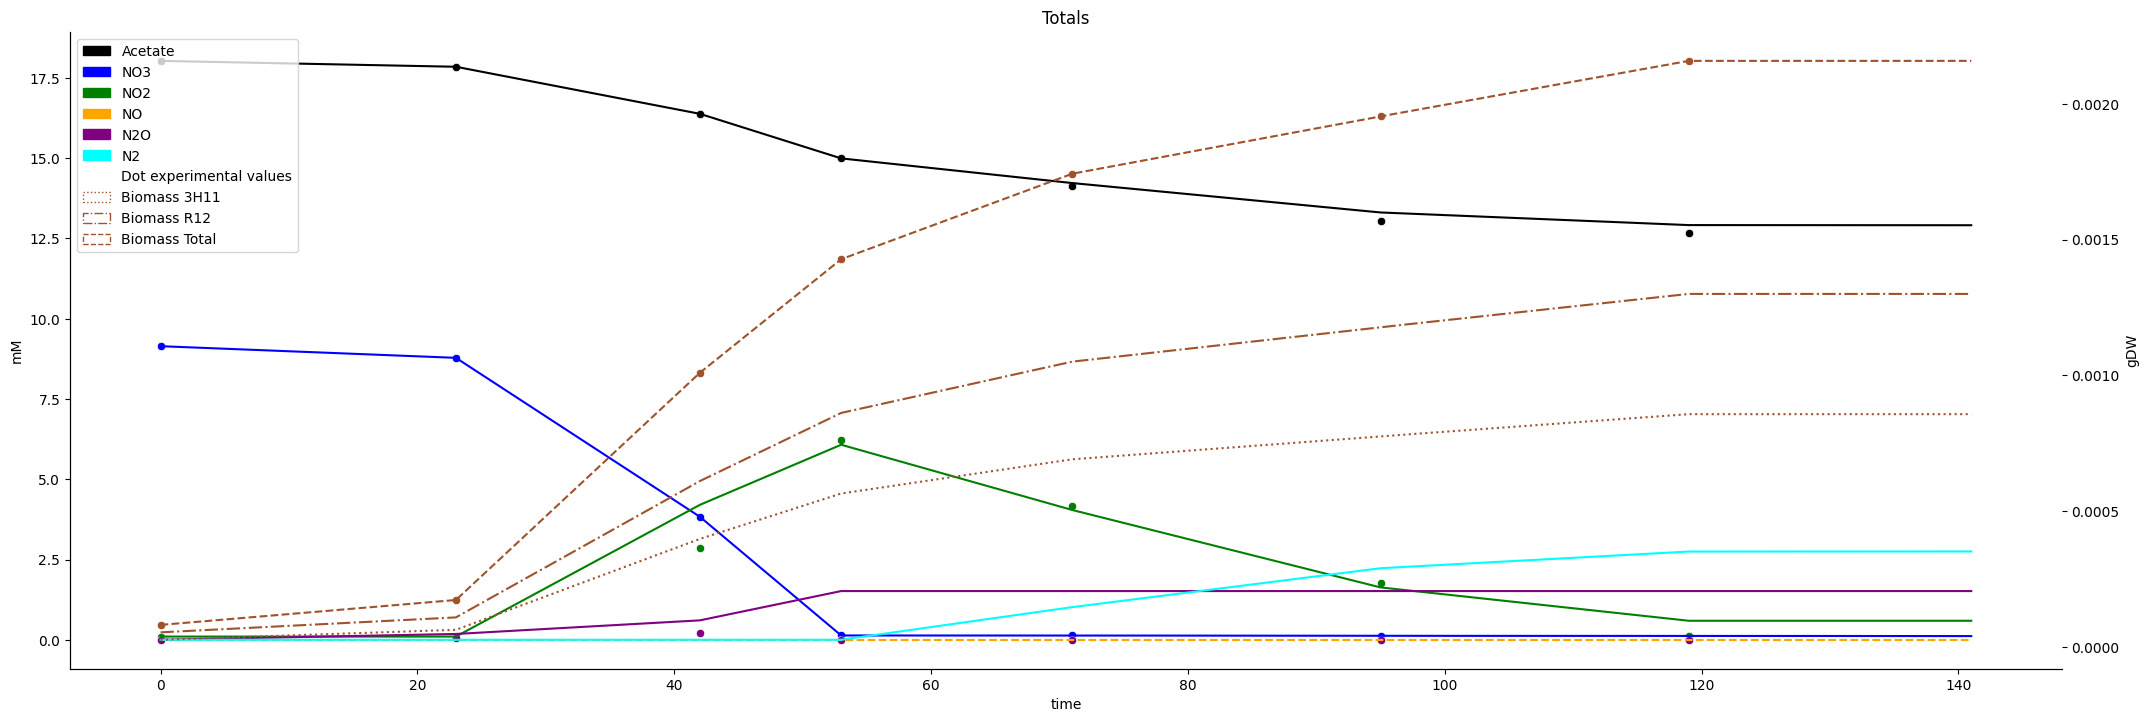

In [34]:
comm_plots.plot_total_acc(pred_syncom, exp_syncom)

We can see that R12 is no longer producing Acetate but there is no uptake either. Lets see what carbon sources they are exchanging

In [35]:
model_comm_io(model_comm2, solution_array[1]['solution'], exclude)

cpd00106_e0 Fumarate [e0] cA;e0 0.0497130439243808
cpd00106_e0 Fumarate [e0] cR;e0 -0.0497130439243808
	 total Fumarate [e0] 0.0
cpd00075_e0 Nitrite [e0] cR;e0 0.007309239269061858
cpd00075_e0 Nitrite [e0] cA;e0 0.13427521363624614
	 total Nitrite [e0] 0.1415844529
cpd00036_e0 Succinate [e0] cA;e0 -0.00016769664689503434
cpd00036_e0 Succinate [e0] cR;e0 0.00016769664689503434
	 total Succinate [e0] 0.0
cpd00659_e0 Nitrous oxide [e0] cR;e0 0.006390919750588489
	 total Nitrous oxide [e0] 0.0063909198
cpd00209_e0 Nitrate [e0] cR;e0 -0.020091078770238836
cpd00209_e0 Nitrate [e0] cA;e0 -0.13427521363624614
	 total Nitrate [e0] -0.1543662924
cpd00029_e0 Acetate [e0] cR;e0 -0.005794041919127427
cpd00029_e0 Acetate [e0] cA;e0 -0.07136426908087257
	 total Acetate [e0] -0.077158311
cpd00020_e0 Pyruvate [e0] cA;e0 -0.04038336584013636
cpd00020_e0 Pyruvate [e0] cR;e0 0.04038336584013636
	 total Pyruvate [e0] 0.0
cpd01981_e0 5-Methylthio-D-ribose [e0] cA;e0 1.1602675123102006e-06
	 total 5-Methylth

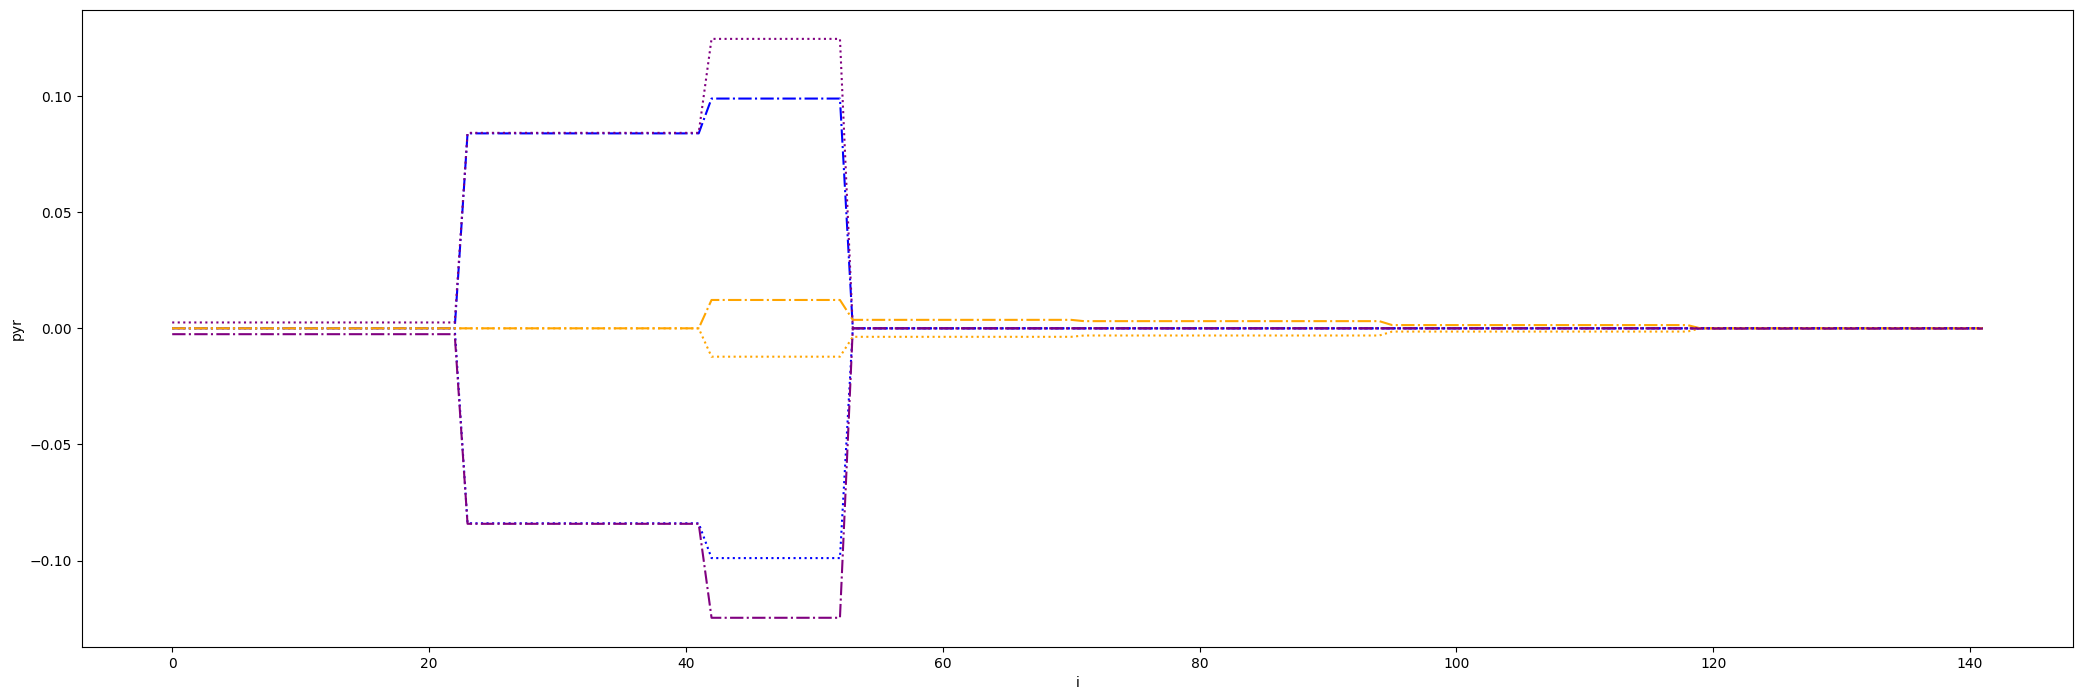

In [37]:
colors = {
    'pyr': 'blue',
    'succ': 'orange',
    'fum': 'purple',
}
fig, ax_arr = plt.subplots(1, 1)
fig.set_size_inches(25.7, 8.27)
d = plot_data_I
_ax = ax_arr
for k, color in colors.items():
    sns.lineplot(data=d[1], x='i', y=k, ax=_ax, color=color, linestyle=comm_plots.linestyle_3h11)
    sns.lineplot(data=d[2], x='i', y=k, ax=_ax, color=color, linestyle=comm_plots.linestyle_r12)

We can see that 3H11 is providing fumarate as carbon source to R12. We will block and check next behavior

In [38]:
# fum
model_comm2.reactions.rxn05561_cR.bounds = (-1000, 0)
model_comm2.reactions.rxn05561_cA.bounds = (-1000, 0)

0 GROWTH 0 ATPM, exceess 0.00017600606386170958 0.00017202102386170958
0 MAX isolate ATPM 0.028253847182977375 0.02376587463924424
1 GROWTH 0 ATPM, exceess 0.001705349696589219 0.001661338796589219
1 MAX isolate ATPM 0.32633503773439104 0.22892535968768418
2 GROWTH 0 ATPM, exceess 0.0027893861654096097 0.0027514028654096094
2 MAX isolate ATPM 0.49367328899977786 0.3790712785812422
3 GROWTH 0 ATPM, exceess 0.0008420868425733763 0.0008246068425733764
3 MAX isolate ATPM 0.10949406691900601 0.10949272552798239
4 GROWTH 0 ATPM, exceess 0.0007943173851817941 0.0007855273851817942
4 MAX isolate ATPM 0.09911138333127378 0.09911199665320303
5 GROWTH 0 ATPM, exceess 0.0002891237871341901 0.0002806127871341901
5 MAX isolate ATPM 0.04176962520883251 0.04176868326299718
6 GROWTH 0 ATPM, exceess 7.69352976819308e-06 9.15543976819308e-06
6 MAX isolate ATPM 0.0007191215624999996 0.0005877256754032257
Acetate: -0.00796337 NO3 -0.015765185 NO2 -0.000300664 min community biomass 3.98504e-06 mATP 3H11 0.0

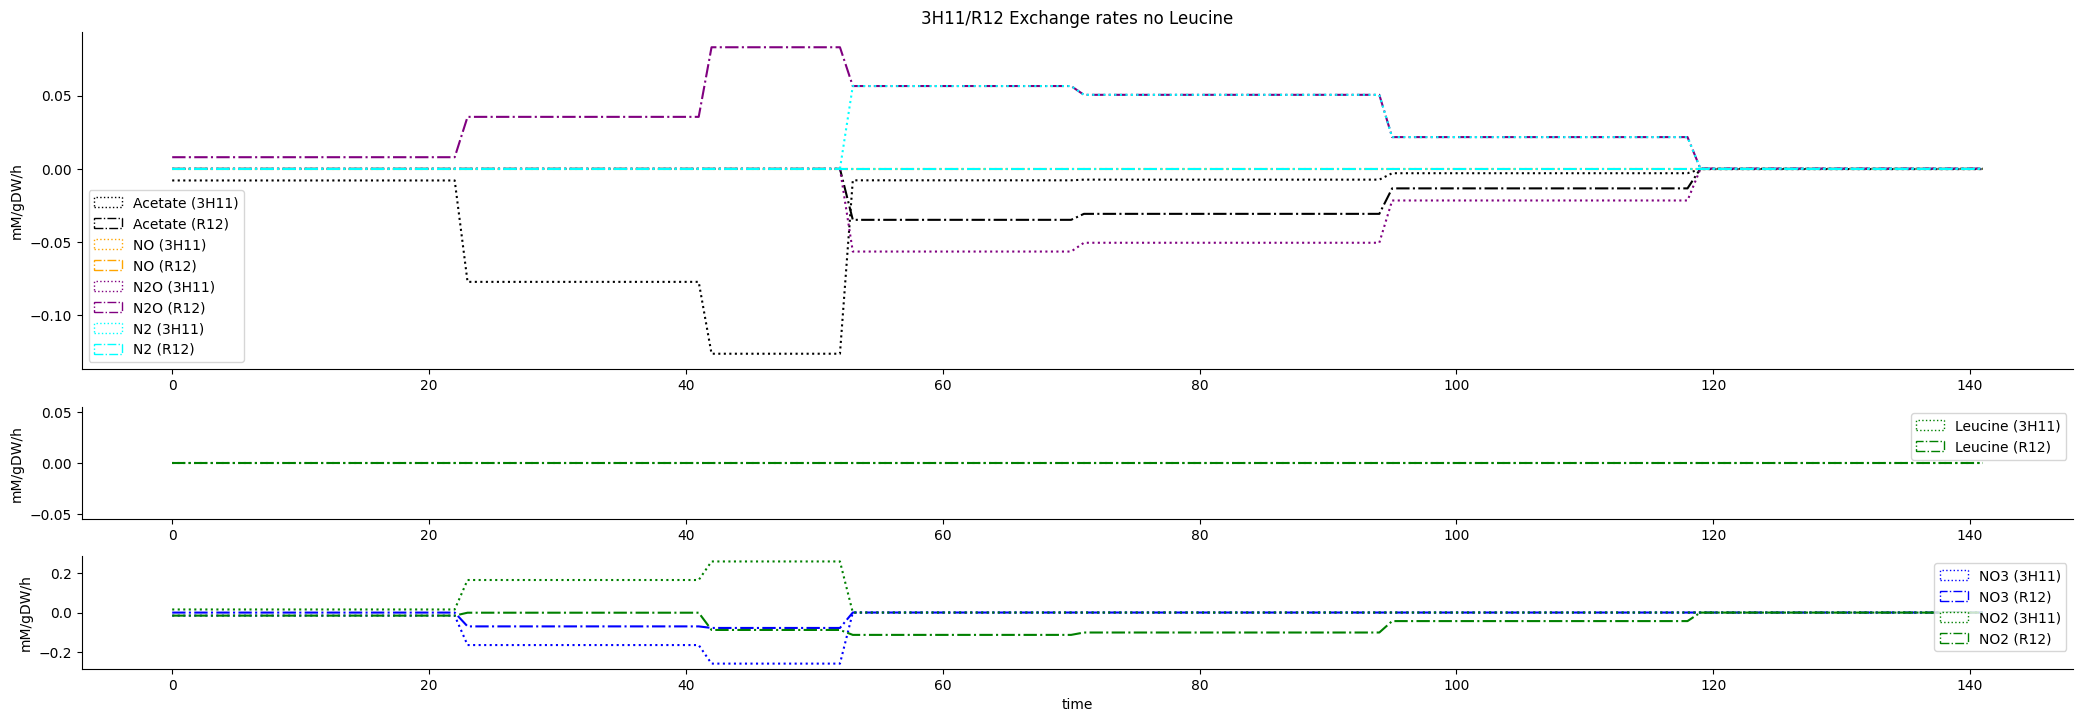

In [39]:
comm_plots = CommPlots(model_comm2)
atpm_max_cA_isolate, atpm_max_cR_isolate, time_steps, expected_growth_60R_40A, rates = comm_plots.constants()
model_comm2.reactions.ATPM_cA.lower_bound = 0
model_comm2.reactions.ATPM_cR.lower_bound = 0
solution_array = comm_plots.generate_solutions(cobra, rates, expected_growth_60R_40A)
solution_exp = comm_plots.generate_growth_gap_solutions(cobra, expected_growth_60R_40A, rates, solution_array)
exp_syncom = comm_plots.get_exp_syncom()
pred_syncom = comm_plots.generate_total_acc_data(time_steps, solution_exp)
plot_data_II = comm_plots.generate_organism_uptake_data(time_steps, solution_exp, monitor)
comm_plots.plot_organism_uptake_data(plot_data_II, title='3H11/R12 Exchange rates no Leucine')

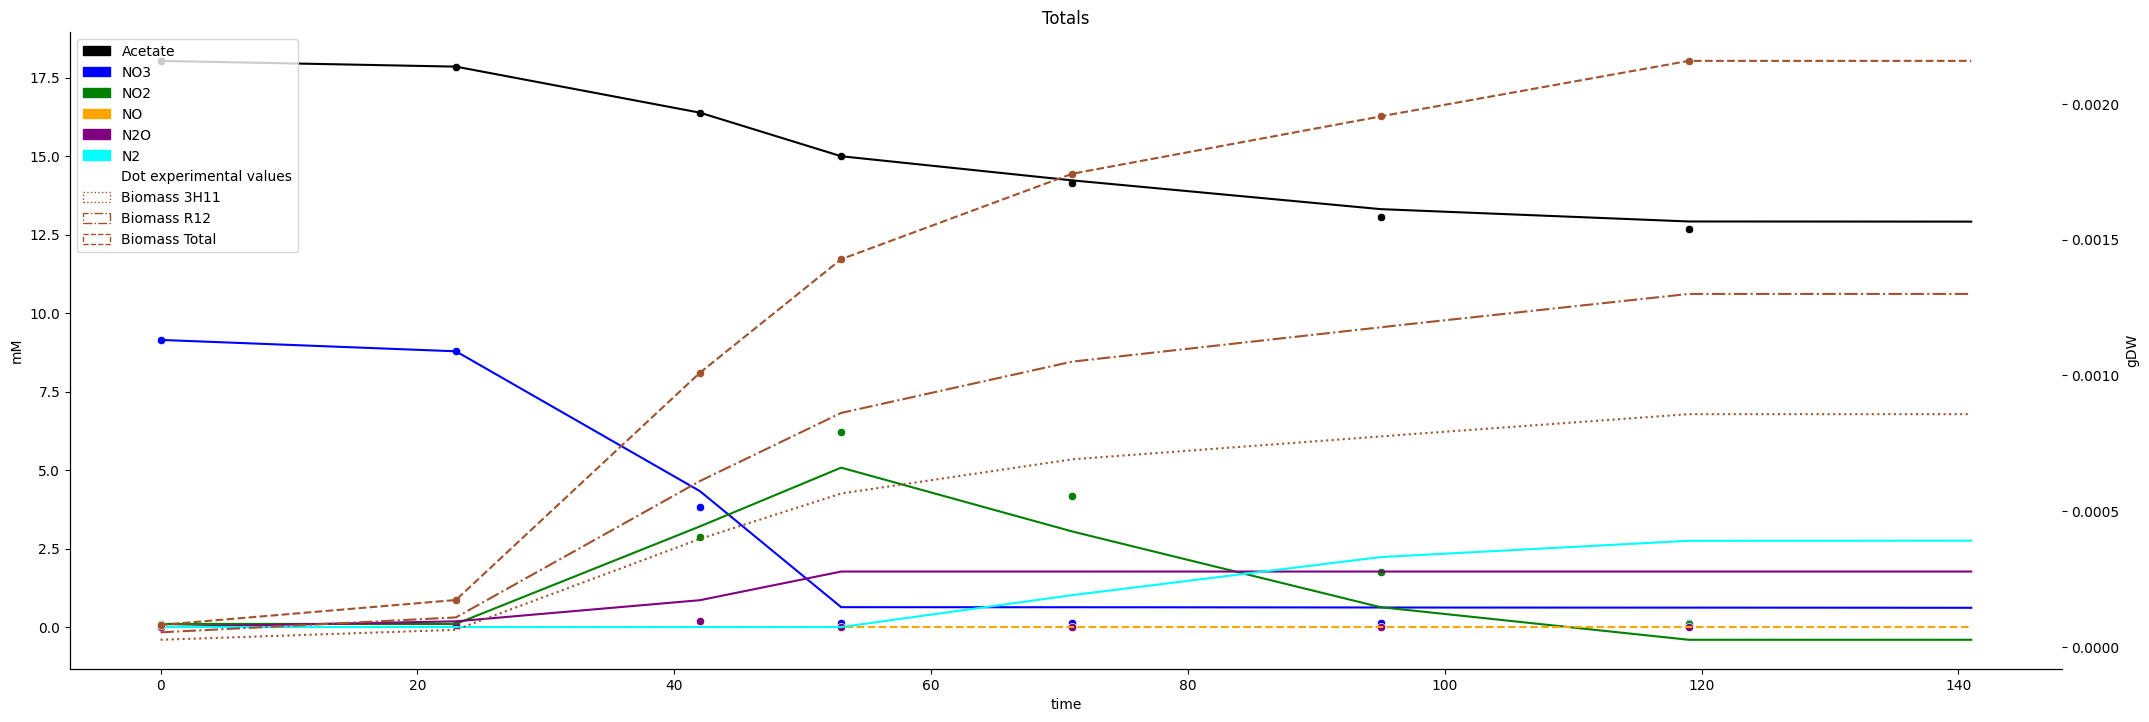

In [40]:
comm_plots.plot_total_acc(pred_syncom, exp_syncom)

In [41]:
model_comm_io(model_comm2, solution_array[1]['solution'], exclude)

cpd00075_e0 Nitrite [e0] cR;e0 -0.034090727667354104
cpd00075_e0 Nitrite [e0] cA;e0 0.10228575497233412
	 total Nitrite [e0] 0.0681950273
cpd00036_e0 Succinate [e0] cA;e0 0.041490830413884225
cpd00036_e0 Succinate [e0] cR;e0 -0.041490830413884225
	 total Succinate [e0] 0.0
cpd00659_e0 Nitrous oxide [e0] cR;e0 0.02683616198030581
	 total Nitrous oxide [e0] 0.026836162
cpd00209_e0 Nitrate [e0] cR;e0 -0.019581596293257515
cpd00209_e0 Nitrate [e0] cA;e0 -0.10228575497233412
	 total Nitrate [e0] -0.1218673513
cpd00029_e0 Acetate [e0] cA;e0 -0.077158311
	 total Acetate [e0] -0.077158311
cpd00020_e0 Pyruvate [e0] cA;e0 -0.027421855284695193
cpd00020_e0 Pyruvate [e0] cR;e0 0.027421855284695193
	 total Pyruvate [e0] 0.0
cpd01981_e0 5-Methylthio-D-ribose [e0] cA;e0 1.091451543289356e-06
	 total 5-Methylthio-D-ribose [e0] 1.0915e-06


We fumarate was replaced by succinate. Repeat the block process.

In [42]:
# succ
model_comm2.reactions.rxn05654_cR.bounds = (-1000, 0)
model_comm2.reactions.rxn05654_cA.bounds = (-1000, 0)

0 GROWTH 0 ATPM, exceess 0.00016914051438736224 0.00016515547438736224
0 MAX isolate ATPM 0.027876884296325226 0.020443849671343942
1 GROWTH 0 ATPM, exceess 0.0016388283367217628 0.0015948174367217628
1 MAX isolate ATPM 0.32594856586284277 0.19715081146576582
2 GROWTH 0 ATPM, exceess 0.0026805792964785173 0.002642595996478517
2 MAX isolate ATPM 0.4897860398830831 0.3266406802949368
3 GROWTH 0 ATPM, exceess 0.0008420868425733772 0.0008246068425733773
3 MAX isolate ATPM 0.10456666393039563 0.1014601278947442
4 GROWTH 0 ATPM, exceess 0.0007943173851817874 0.0007855273851817875
4 MAX isolate ATPM 0.09451568115729356 0.09157216028438912
5 GROWTH 0 ATPM, exceess 0.0002891237871341891 0.0002806127871341891
5 MAX isolate ATPM 0.039949526865540264 0.0417581432435352
6 GROWTH 0 ATPM, exceess 7.302270201145993e-06 8.764180201145993e-06
6 MAX isolate ATPM 0.0007051240625 0.0005361368023255815
Acetate: -0.00796337 NO3 -0.015765185 NO2 -0.000300664 min community biomass 3.98504e-06 mATP 3H11 0.01115

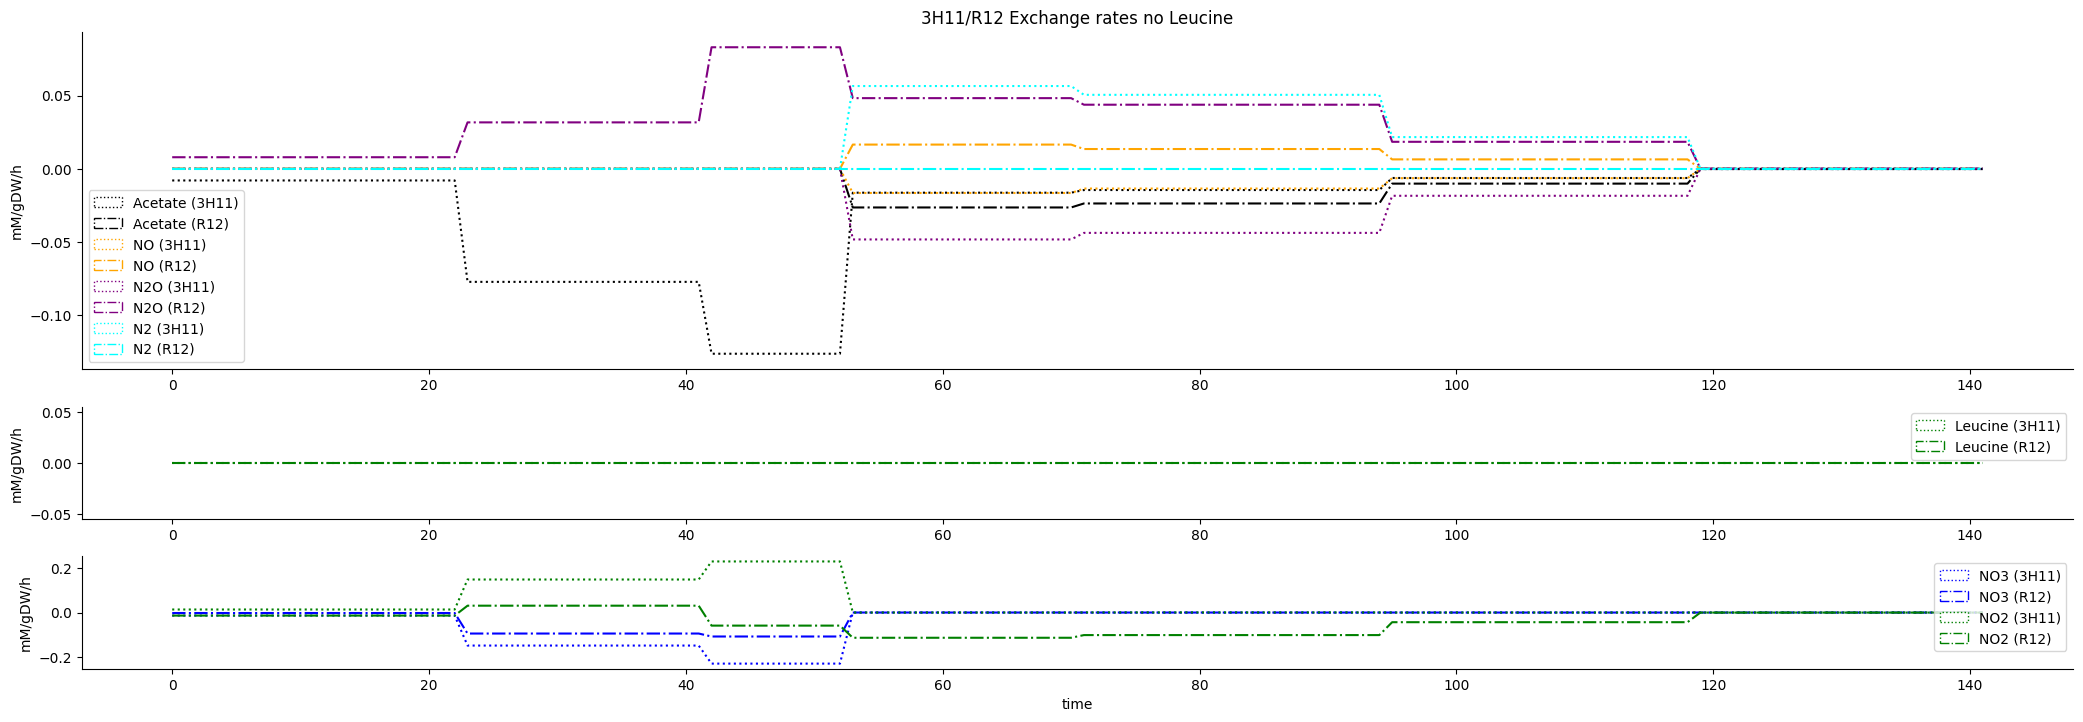

In [43]:
comm_plots = CommPlots(model_comm2)
atpm_max_cA_isolate, atpm_max_cR_isolate, time_steps, expected_growth_60R_40A, rates = comm_plots.constants()
model_comm2.reactions.ATPM_cA.lower_bound = 0
model_comm2.reactions.ATPM_cR.lower_bound = 0
solution_array = comm_plots.generate_solutions(cobra, rates, expected_growth_60R_40A)
solution_exp = comm_plots.generate_growth_gap_solutions(cobra, expected_growth_60R_40A, rates, solution_array)
exp_syncom = comm_plots.get_exp_syncom()
pred_syncom = comm_plots.generate_total_acc_data(time_steps, solution_exp)
plot_data_III = comm_plots.generate_organism_uptake_data(time_steps, solution_exp, monitor)
comm_plots.plot_organism_uptake_data(plot_data_III, title='3H11/R12 Exchange rates no Leucine')

In [44]:
model_comm_io(model_comm2, solution_array[1]['solution'], exclude)

cpd00075_e0 Nitrite [e0] cR;e0 -0.018230766874979543
cpd00075_e0 Nitrite [e0] cA;e0 0.08469576877165855
	 total Nitrite [e0] 0.0664650019
cpd00659_e0 Nitrous oxide [e0] cR;e0 0.028566578843367996
	 total Nitrous oxide [e0] 0.0285665788
cpd00107_e0 L-Leucine [e0] cA;e0 0.0003562619559536449
cpd00107_e0 L-Leucine [e0] cR;e0 -0.0003562619559536449
	 total L-Leucine [e0] 0.0
cpd00209_e0 Nitrate [e0] cR;e0 -0.03890239081175645
cpd00209_e0 Nitrate [e0] cA;e0 -0.08469576877165855
	 total Nitrate [e0] -0.1235981596
cpd00029_e0 Acetate [e0] cR;e0 -0.010076297942230526
cpd00029_e0 Acetate [e0] cA;e0 -0.06708201305776947
	 total Acetate [e0] -0.077158311
cpd00020_e0 Pyruvate [e0] cA;e0 0.02526664394459227
cpd00020_e0 Pyruvate [e0] cR;e0 -0.02526664394459227
	 total Pyruvate [e0] 0.0
cpd01981_e0 5-Methylthio-D-ribose [e0] cA;e0 1.0488767910058477e-06
	 total 5-Methylthio-D-ribose [e0] 1.0489e-06


We pyruvate and small ammount of Leucine takes place. Repeat the block process for pyruvate.

In [45]:
# pyr
model_comm2.reactions.rxn05469_cA.bounds = (-1000, 0)
model_comm2.reactions.rxn05469_cR.bounds = (-1000, 0)

0 GROWTH 0 ATPM, exceess 0.0001589801322098818 0.0001549950922098818
0 MAX isolate ATPM 0.027563884447142112 0.02043859317968514
1 GROWTH 0 ATPM, exceess 0.0015403828384052555 0.0014963719384052554
1 MAX isolate ATPM 0.3248109693718199 0.19678776666346295
2 GROWTH 0 ATPM, exceess 0.0025195551314054205 0.0024815718314054203
2 MAX isolate ATPM 0.4863362443128868 0.3263365429632249
3 GROWTH 0 ATPM, exceess 0.0008420868425733696 0.0008246068425733697
3 MAX isolate ATPM 0.10170071059730935 0.07999707202555101
4 GROWTH 0 ATPM, exceess 0.0007943173851817941 0.0007855273851817942
4 MAX isolate ATPM 0.0920665987538019 0.07223625858068619
5 GROWTH 0 ATPM, exceess 0.0002891237871341888 0.0002806127871341888
5 MAX isolate ATPM 0.038811855648298185 0.04175627276529734
6 GROWTH 0 ATPM, exceess 6.4906017003601796e-06 7.952511700360179e-06
6 MAX isolate ATPM 0.0006952879814189193 0.00046495643092105257
Acetate: -0.00796337 NO3 -0.015765185 NO2 -0.000300664 min community biomass 3.98504e-06 mATP 3H11 0

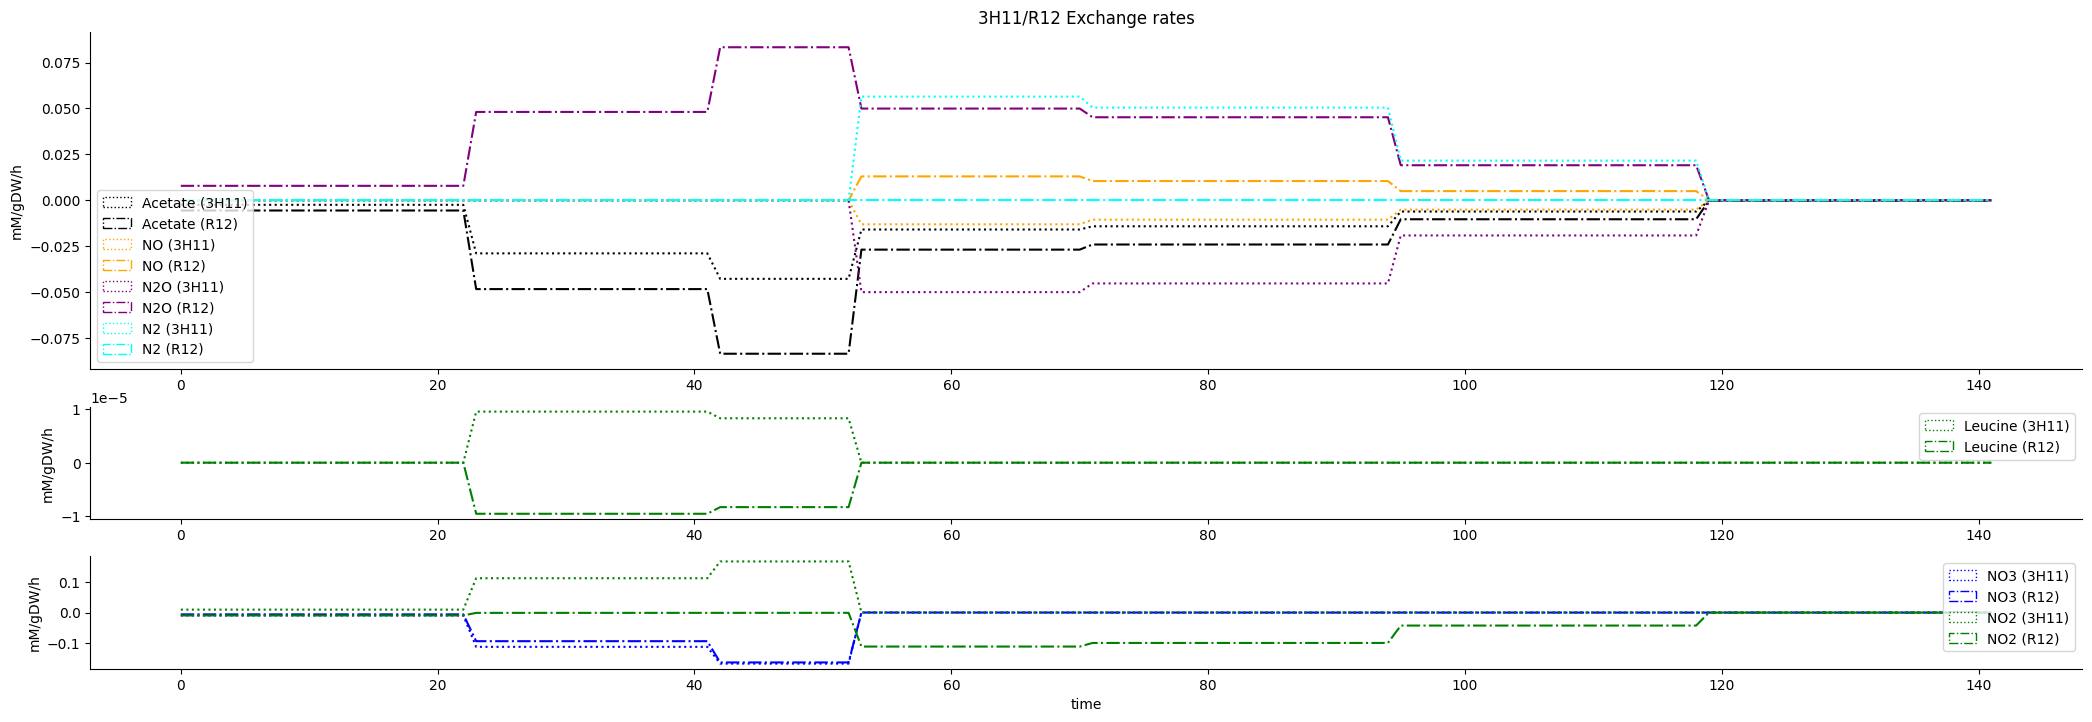

In [46]:
%run plots.py
comm_plots = CommPlots(model_comm2)
atpm_max_cA_isolate, atpm_max_cR_isolate, time_steps, expected_growth_60R_40A, rates = comm_plots.constants()
model_comm2.reactions.ATPM_cA.lower_bound = 0
model_comm2.reactions.ATPM_cR.lower_bound = 0
solution_array = comm_plots.generate_solutions(cobra, rates, expected_growth_60R_40A)
solution_exp = comm_plots.generate_growth_gap_solutions(cobra, expected_growth_60R_40A, rates, solution_array)
exp_syncom = comm_plots.get_exp_syncom()
pred_syncom = comm_plots.generate_total_acc_data(time_steps, solution_exp)
plot_data_IV = comm_plots.generate_organism_uptake_data(time_steps, solution_exp, monitor)
comm_plots.plot_organism_uptake_data(plot_data_IV, title='3H11/R12 Exchange rates')

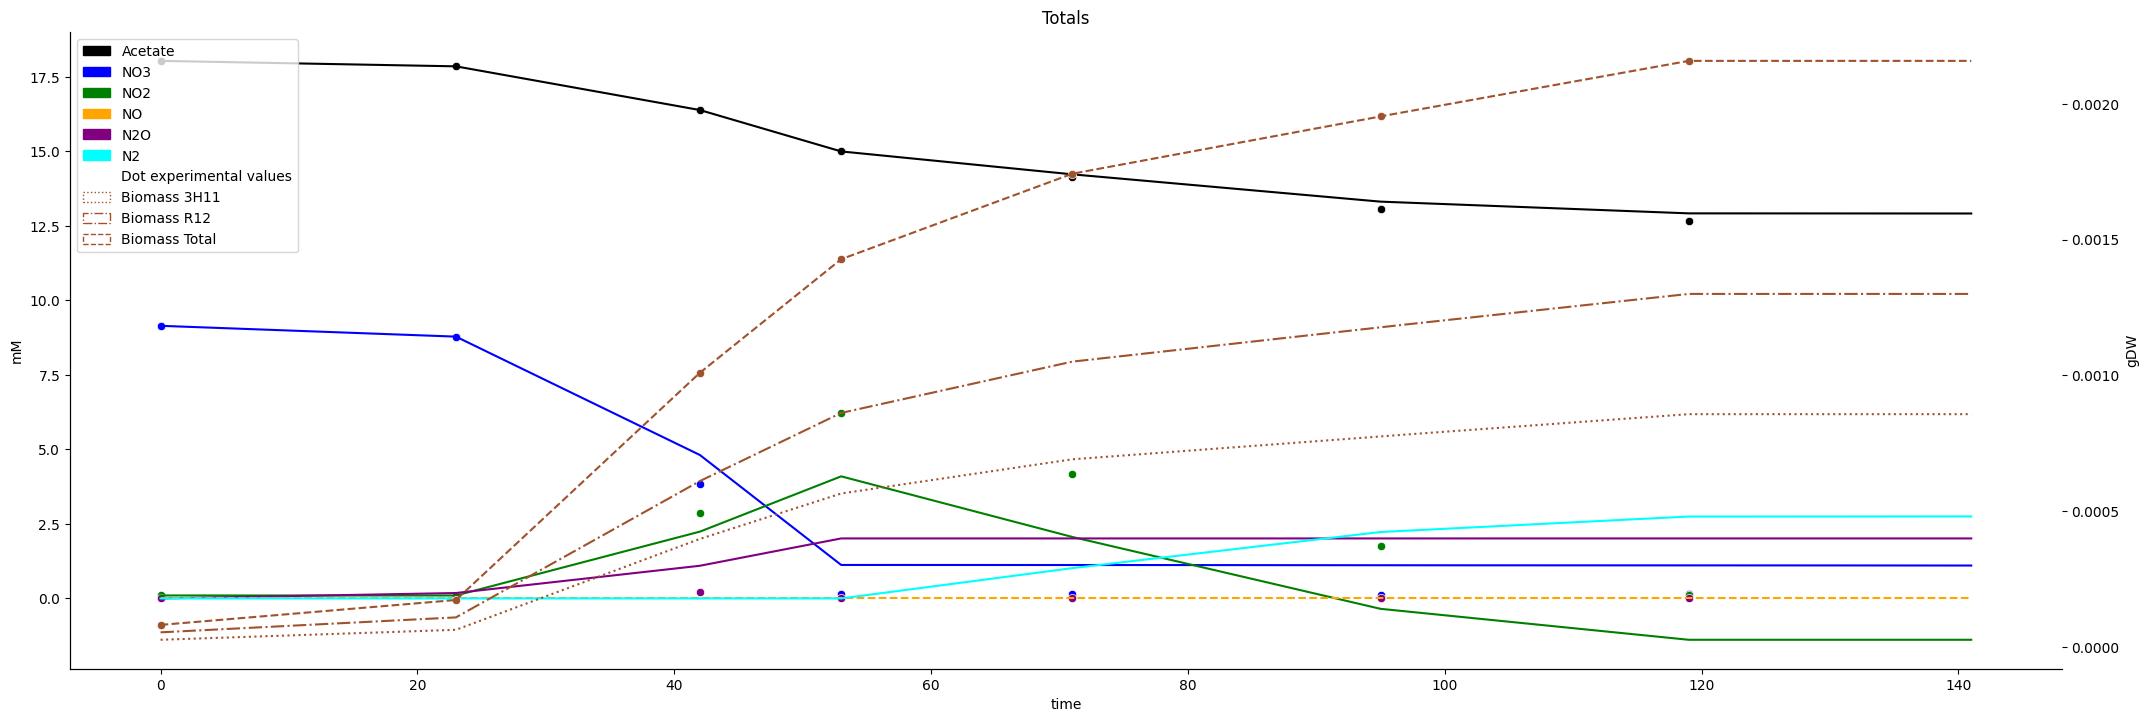

In [47]:
comm_plots.plot_total_acc(pred_syncom, exp_syncom)

In [49]:
model_comm_io(model_comm2, solution_array[1]['solution'], exclude)

cpd00075_e0 Nitrite [e0] cR;e0 -0.04088449268307126
cpd00075_e0 Nitrite [e0] cA;e0 0.054042814807204964
	 total Nitrite [e0] 0.0131583221
cpd00659_e0 Nitrous oxide [e0] cR;e0 0.04381403704577788
	 total Nitrous oxide [e0] 0.043814037
cpd00107_e0 L-Leucine [e0] cA;e0 0.00033486106545467086
cpd00107_e0 L-Leucine [e0] cR;e0 -0.00033486106545467086
	 total L-Leucine [e0] 0.0
cpd00209_e0 Nitrate [e0] cR;e0 -0.0467435814084845
cpd00209_e0 Nitrate [e0] cA;e0 -0.054042814807204964
	 total Nitrate [e0] -0.1007863962
cpd00029_e0 Acetate [e0] cR;e0 -0.05018333949499642
cpd00029_e0 Acetate [e0] cA;e0 -0.026974971505003574
	 total Acetate [e0] -0.077158311
cpd01981_e0 5-Methylthio-D-ribose [e0] cA;e0 9.858700708695943e-07
	 total 5-Methylthio-D-ribose [e0] 9.859e-07


0 GROWTH 0 ATPM, exceess 0.00018007799754012928 0.00017609295754012928
0 MAX isolate ATPM 0.02825721735909012 0.024848880005350994
1 GROWTH 0 ATPM, exceess 0.0017171547989145428 0.0016731438989145428
1 MAX isolate ATPM 0.3263514014028788 0.22004927841534216
2 GROWTH 0 ATPM, exceess 0.002696327091914698 0.0026583437919146984
2 MAX isolate ATPM 0.4936913755875299 0.34958888924857484
3 GROWTH 0 ATPM, exceess 0.0008420868425733752 0.0008246068425733753
3 MAX isolate ATPM 0.10949495390068413 0.10949102449526033
4 GROWTH 0 ATPM, exceess 0.0007943173851818087 0.0007855273851818087
4 MAX isolate ATPM 0.09911093940644833 0.09911158134181275
5 GROWTH 0 ATPM, exceess 0.0002891237871341819 0.0002806127871341819
5 MAX isolate ATPM 0.04176542222407362 0.04176717194939848
6 GROWTH 0 ATPM, exceess 7.493765834156543e-06 8.955675834156543e-06
6 MAX isolate ATPM 0.0007191215625000002 0.0006209640937499998
Acetate: -0.00796337 NO3 -0.015765185 NO2 -0.000300664 min community biomass 3.98504e-06 mATP 3H11 0

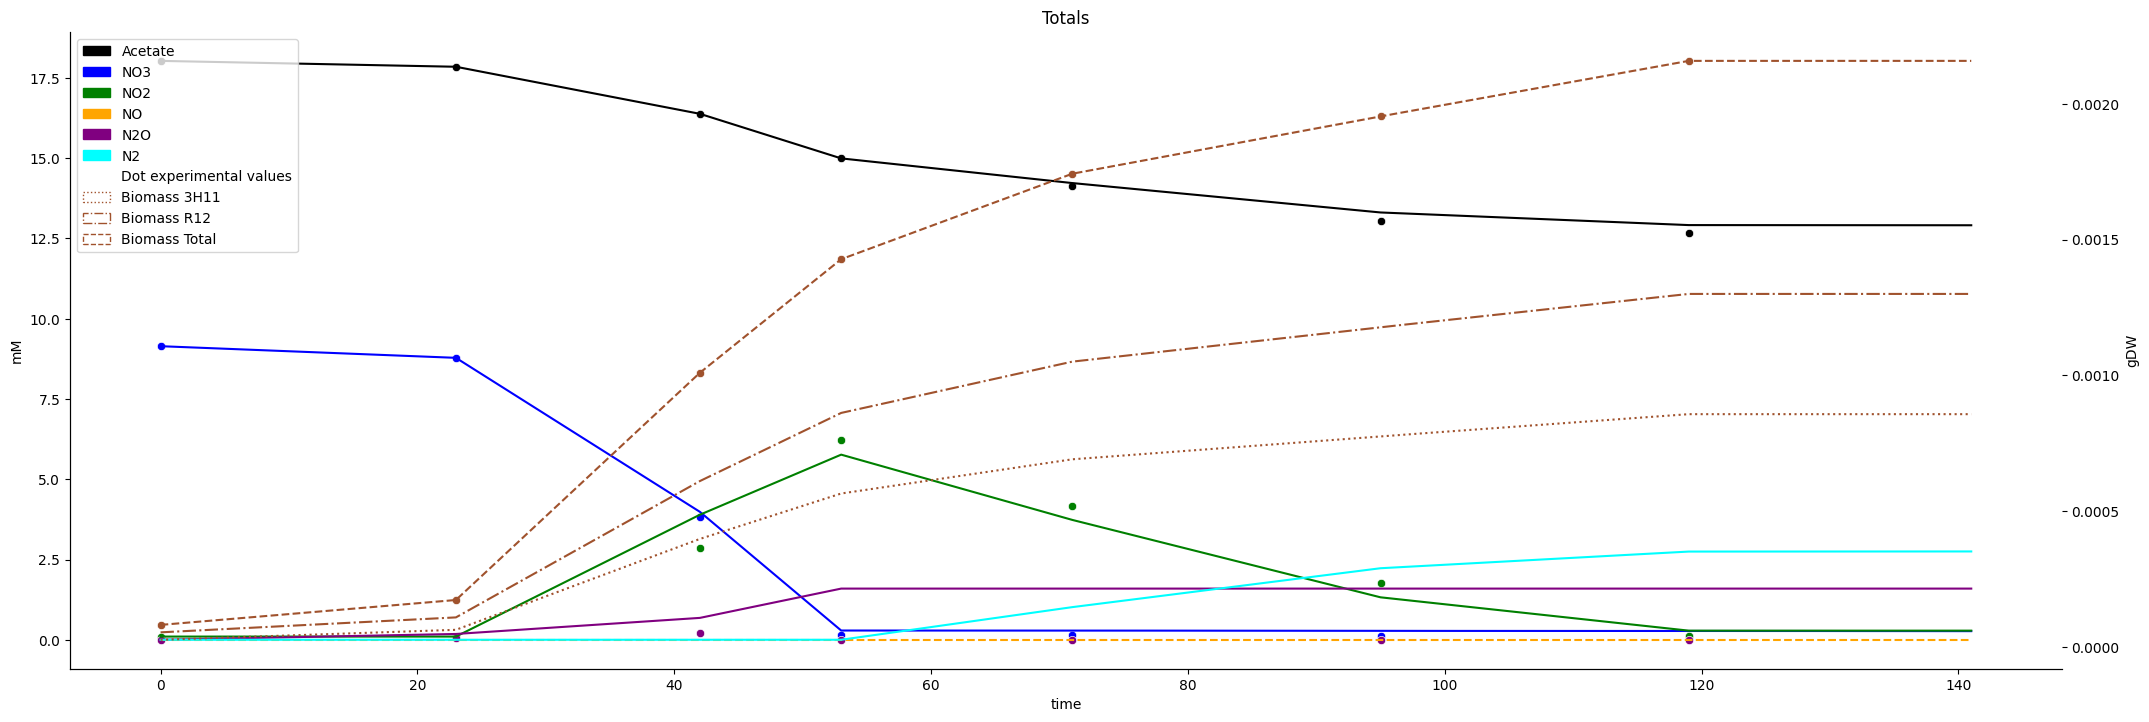

In [50]:
# fum
model_comm2.reactions.rxn05561_cR.bounds = (-1000, 0.02)
model_comm2.reactions.rxn05561_cA.bounds = (-1000, 0.02)
%run plots.py
comm_plots = CommPlots(model_comm2)
atpm_max_cA_isolate, atpm_max_cR_isolate, time_steps, expected_growth_60R_40A, rates = comm_plots.constants()
model_comm2.reactions.ATPM_cA.lower_bound = 0
model_comm2.reactions.ATPM_cR.lower_bound = 0
solution_array = comm_plots.generate_solutions(cobra, rates, expected_growth_60R_40A)
solution_exp = comm_plots.generate_growth_gap_solutions(cobra, expected_growth_60R_40A, rates, solution_array)
exp_syncom = comm_plots.get_exp_syncom()
pred_syncom = comm_plots.generate_total_acc_data(time_steps, solution_exp)
plot_data_V = comm_plots.generate_organism_uptake_data(time_steps, solution_exp, monitor)
comm_plots.plot_total_acc(pred_syncom, exp_syncom)

In [55]:
model_comm_io(model_comm2, solution_array[1]['solution'], exclude)

cpd00106_e0 Fumarate [e0] cA;e0 0.02
cpd00106_e0 Fumarate [e0] cR;e0 -0.02
	 total Fumarate [e0] 0.0
cpd00075_e0 Nitrite [e0] cR;e0 -0.005576334052533619
cpd00075_e0 Nitrite [e0] cA;e0 0.10673117143058604
	 total Nitrite [e0] 0.1011548374
cpd00659_e0 Nitrous oxide [e0] cR;e0 0.01836587793511403
	 total Nitrous oxide [e0] 0.0183658779
cpd00107_e0 L-Leucine [e0] cA;e0 0.0003732892052374769
cpd00107_e0 L-Leucine [e0] cR;e0 -0.00037328920523747687
	 total L-Leucine [e0] 0.0
cpd00209_e0 Nitrate [e0] cR;e0 -0.031155421817694443
cpd00209_e0 Nitrate [e0] cA;e0 -0.10673117143058604
	 total Nitrate [e0] -0.1378865932
cpd00029_e0 Acetate [e0] cR;e0 -0.005466111717094043
cpd00029_e0 Acetate [e0] cA;e0 -0.07169219928290595
	 total Acetate [e0] -0.077158311
cpd01981_e0 5-Methylthio-D-ribose [e0] cA;e0 1.0990070007872718e-06
	 total 5-Methylthio-D-ribose [e0] 1.099e-06


In [91]:
index = {
    0: 'total',
    1: '3H11',
    2: 'R12',
}
lines = plot_data_zero_leu[0].keys()
data = {}
for i, alias in index.items():
    for k in lines:
        if len(plot_data_zero_leu[i][k]) > 0:
            data[f'{k} ({alias})'] = plot_data_zero_leu[i][k]
import pandas as pd
pd.DataFrame(data).to_csv('./export/syncom_final.tsv', sep='\t')

# Debug stuff

In [100]:
model_comm2.reactions.rxn08655_cR.upper_bound = 0

In [45]:
model_comm2.reactions.rxn00172_cR.lower_bound = -1000

In [30]:



model_comm2.reactions.rxn00623_cR.bounds = (-1, 1000)
model_comm2.reactions.rxn00623_cA.bounds = (-1, 1000)

In [98]:
solution_array[1]['solution']['rxn08655_cR']

5.437960019117976e-06

In [54]:
plot_data_zero_leu[1]['succ']

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -4.493669160264987e-06,
 -4.493669160264987e-06,
 -4.493669160264987e-06,
 -4.493669160264987e-06,
 -4.493669160264987e-06,
 -4.493669160264987e-06,
 -4.493669160264987e-06,
 -4.493669160264987e-06,
 -4.493669160264987e-06,
 -4.493669160264987e-06,
 -4.493669160264987e-06,
 -4.493669160264987e-06,
 -4.493669160264987e-06,
 -4.493669160264987e-06,
 -4.493669160264987e-06,
 -4.493669160264987e-06,
 -4.493669160264987e-06,
 -4.493669160264987e-06,
 -4.493669160264987e-06,
 -0.012194317454964743,
 -0.012194317454964743,
 -0.012194317454964743,
 -0.012194317454964743,
 -0.012194317454964743,
 -0.012194317454964743,
 -0.012194317454964743,
 -0.012194317454964743,
 -0.012194317454964743,
 -0.012194317454964743,
 -0.012194317454964743,
 -0.0036528080285403997,
 -0.0036528080285403997,
 -0.0036528080285403997,
 -0.0036528080285403997,
 -0.0036528080285403997,
 -0.0036528080285403997,
 -0.003652808028540

0 GROWTH 0 ATPM, exceess 0.00016628778640350638 0.00016230274640350638
0 MAX isolate ATPM 0.0282505623769332 0.020719461078731388
1 GROWTH 0 ATPM, exceess 0.001611187818577243 0.001567176918577243
1 MAX isolate ATPM 0.326349924359528 0.1995518616391905
2 GROWTH 0 ATPM, exceess 0.0026353685815903357 0.002597385281590336
2 MAX isolate ATPM 0.49369317604172946 0.33020744508800765
3 GROWTH 0 ATPM, exceess 0.0008420868425733736 0.0008246068425733737
3 MAX isolate ATPM 0.10388501054906486 0.09783329923552578
4 GROWTH 0 ATPM, exceess 0.0007943173851817955 0.0007855273851817956
4 MAX isolate ATPM 0.0939358758818359 0.08827827415929718
5 GROWTH 0 ATPM, exceess 0.0002891237871341885 0.0002806127871341885
5 MAX isolate ATPM 0.03966737659251745 0.041750664404489074
6 GROWTH 0 ATPM, exceess 6.79928852164172e-06 8.26119852164172e-06
6 MAX isolate ATPM 0.0007191215625 0.0005530854276315785
Acetate: -0.00796337 NO3 -0.015765185 NO2 -0.000300664 min community biomass 3.98504e-06 mATP 3H11 0.01130022495

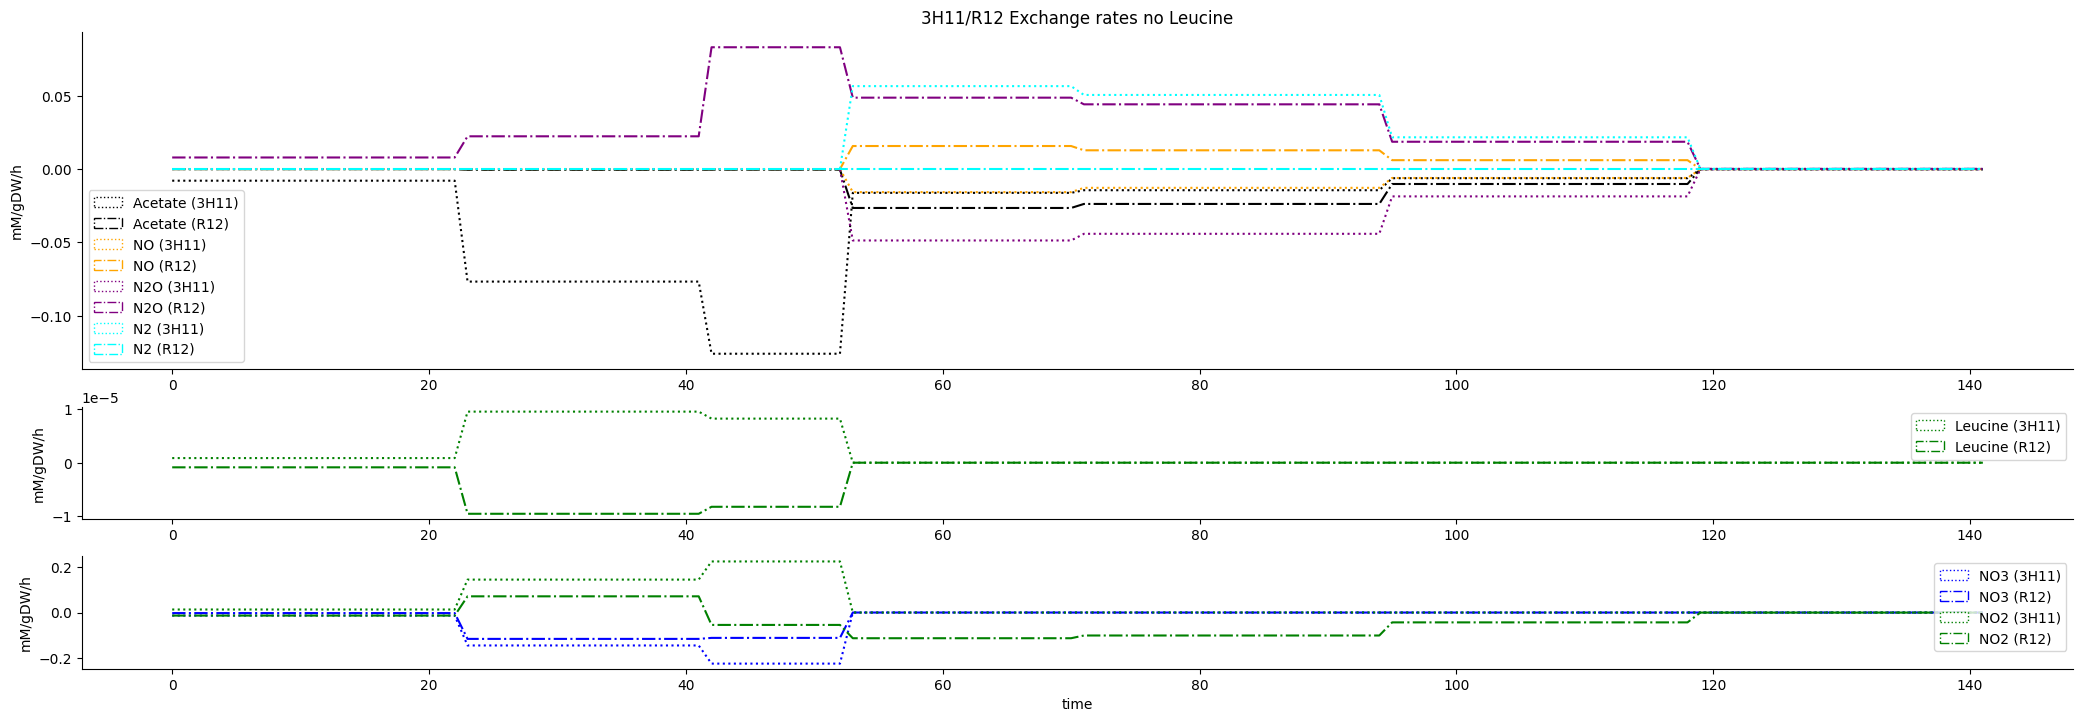

In [77]:
comm_plots = CommPlots(model_comm2)
atpm_max_cA_isolate, atpm_max_cR_isolate, time_steps, expected_growth_60R_40A, rates = comm_plots.constants()
model_comm2.reactions.ATPM_cA.lower_bound = 0
model_comm2.reactions.ATPM_cR.lower_bound = 0
solution_array = comm_plots.generate_solutions(cobra, rates, expected_growth_60R_40A)
solution_exp = comm_plots.generate_growth_gap_solutions(cobra, expected_growth_60R_40A, rates, solution_array)
exp_syncom = comm_plots.get_exp_syncom()
pred_syncom = comm_plots.generate_total_acc_data(time_steps, solution_exp)
plot_data_zero_leu = comm_plots.generate_organism_uptake_data(time_steps, solution_exp, monitor)
comm_plots.plot_organism_uptake_data(plot_data_zero_leu, title='3H11/R12 Exchange rates no Leucine')

In [65]:
solution_array

{0: {'solution': <Solution 0.331 at 0x7fd4e2dbe590>,
  'max_atpm_a': 0.028258277710764328,
  'max_atpm_r': 0.028258277710764328},
 1: {'solution': <Solution 3.403 at 0x7fd4e1ce36a0>,
  'max_atpm_a': 0.32630450880092027,
  'max_atpm_r': 0.32630450880092027},
 2: {'solution': <Solution 5.567 at 0x7fd4e1ba8070>,
  'max_atpm_a': 0.4936580032478576,
  'max_atpm_r': 0.4936580032478576},
 3: {'solution': <Solution 1.980 at 0x7fd4e1ba8490>,
  'max_atpm_a': 0.1094729687944916,
  'max_atpm_r': 0.1094729687944916},
 4: {'solution': <Solution 1.860 at 0x7fd4e1ba8a00>,
  'max_atpm_a': 0.0991014738720491,
  'max_atpm_r': 0.0991014738720491},
 5: {'solution': <Solution 0.680 at 0x7fd4e1ba8f70>,
  'max_atpm_a': 0.041749871204679524,
  'max_atpm_r': 0.041749871204679524},
 6: {'solution': <Solution 0.013 at 0x7fd4e1ba94e0>,
  'max_atpm_a': 0.0007191215624999996,
  'max_atpm_r': 0.0007191215624999996}}

In [61]:
cobra.io.save_json_model(model_comm2, 'syncom.json')

In [58]:
import pandas as pd
df_r12 = pd.read_csv('./data/annotation_rhoda.tsv', sep='\t', index_col=1)
annotation = df_r12['RAST'].to_dict()
annotation_psort = df_r12['psort_loc'].to_dict()
df_3h11 = pd.read_csv('./data/annotation_acido.tsv', sep='\t', index_col=1)
annotation.update(df_3h11['RAST'].to_dict())
annotation_psort.update(df_3h11['psort_loc'].to_dict())

In [56]:
abbr = {
    'Cytoplasmic': 'c',
    'CytoplasmicMembrane': 'cm',
    'Extracellular': 'e',
    'OuterMembrane': 'om',
    'Periplasmic': 'p',
    'Unknown': '?'
}

In [60]:
for g in model_comm2.genes:
    if g.id in annotation:
        g.name = f"{annotation[g.id]} [{abbr[annotation_psort[g.id]]}]"
        #print(g.name)
    else:
        print('?')

In [ ]:
# 0 total 1 3H11 2 R12

In [76]:
plot_data_50_leu[0].keys()

dict_keys(['i', 'growth', 'acetate', 'no3', 'no2', 'no', 'n2o', 'n2', 'leu'])

In [80]:
plot_data_10_leu[2].keys()

dict_keys(['i', 'growth', 'acetate', 'no3', 'no2', 'no', 'n2o', 'n2', 'leu'])

In [78]:
len(plot_data_10_leu)

3

In [91]:
data = {}
for i in range(len(pred_syncom['i'])):
    time_val = pred_syncom['i'][i]
    if time_val not in data:
        data[time_val] = {}
    for attr in pred_syncom.keys():
        if attr != 'i':
            if attr not in data[time_val]:
                data[time_val][attr] = pred_syncom[attr][i]

In [92]:
def append(data, dt, sufix = None):
    for i in range(len(dt['i'])):
        time_val = dt['i'][i]
        if time_val not in data:
            data[time_val] = {}
        for attr in dt.keys():
            if attr != 'i':
                _col = attr + sufix if sufix else attr
                if _col not in data[time_val]:
                    data[time_val][_col] = dt[attr][i]

append(data, total_uptake_data, '_rate')
append(data, plot_data_zero_leu[1], '_3H11_rate__leucine0')
append(data, plot_data_zero_leu[2], '_R12_rate_leucine0')
append(data, plot_data_10_leu[1], '_3H11_rate__leucine10')
append(data, plot_data_10_leu[2], '_R12_rate_leucine10')
append(data, plot_data_50_leu[1], '_3H11_rate_leucine50')
append(data, plot_data_50_leu[2], '_R12_rate_leucine50')

In [93]:
df_output = pd.DataFrame(data).transpose()
df_output.to_csv('table_syncom_exp_fit.tsv', sep='\t')

In [89]:
exp_syncom

{'i': [0, 23, 42, 53, 71, 95, 119],
 'acetate': [18.0313603,
  17.8482028,
  16.3821949,
  14.9939356,
  14.1349641,
  13.0569512,
  12.6637232],
 'biomass': [8.208e-05,
  0.000173736,
  0.001009944,
  0.00142776,
  0.0017424,
  0.00195336,
  0.002157624],
 'no3': [9.14450462,
  8.78190537,
  3.83024557,
  0.13416156,
  0.14078438,
  0.12864254,
  0.13250585],
 'no2': [0.09977915,
  0.09286388,
  2.86216542,
  6.21128614,
  4.17819538,
  1.76742424,
  0.10243888],
 'n2o': [0, 0.06733333, 0.20266667, 0.00333333, 0.00266667, 0.00333333, 0]}